# Yulu Hypothesis Case study

## Scaler Instructions

### Mindset

- Evaluation will be kept lenient, so make sure you attempt this case study.
- It is understandable that you might struggle with getting started on this. Just brainstorm, discuss with peers, or get help from TAs.
- There is no right or wrong answer. We have to become comfortable with dealing with uncertainty in business. This is exactly the skill we want to develop.

### About Yulu

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### How you can help here?

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

### Dataset:

Dataset Link: [yulu_data.csv](https://drive.google.com/file/d/1bsEiXXCJzrgOV5m7lk6rIa7c8q0PzEBo/view?usp=drive_link)

### Column Profiling:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
-- 1: Clear, Few clouds, partly cloudy, partly cloudy
-- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
-- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
-- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

### Concept Used:

- Bi-Variate Analysis
- 2-sample t-test: testing for difference across populations
- ANNOVA
- Chi-square

### How to begin:

- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
- Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
- Select an appropriate test to check whether:
-- Working Day has effect on number of electric cycles rented
-- No. of cycles rented similar or different in different seasons
-- No. of cycles rented similar or different in different weather
-- Weather is dependent on season (check between 2 predictor variable)
- Set up Null Hypothesis (H0)
- State the alternate hypothesis (H1)
- Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
-- Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
- Set a significance level (alpha)
- Calculate test Statistics.
- Decision to accept or reject null hypothesis.
- Inference from the analysis

### Evaluation Criteria (50 Points):

Define Problem Statement and perform Exploratory Data Analysis (10 points)
- Definition of problem (as per given problem statement with additional views)
- Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
- Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
- Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
- Illustrate the insights based on EDA
- Comments on range of attributes, outliers of various attributes
- Comments on the distribution of the variables and relationship between them
- Comments for each univariate and bivariate plots

Hypothesis Testing (30 Points):
- 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)
- ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)
- Chi-square test to check if Weather is dependent on the season (10 points)

Notebook Quality (10 points):
- Structure & Flow
- Well commented code

What good looks like (distribution of 10 points):
- Visual analysis (1)
- Hypothesis formulation (1)
- Select the appropriate test (1)
- Check test assumptions (2)
- Find the p-value(1)
- Conclusion based on the p-value (2)


Discussion Forum Link: Ask Me Anything - Yulu Bikes

### Submission Process:



- Type your insights and recommendations in the text editor.
- Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it in your Google Drive (set the permission to allow public access), and paste that link in the text editor.
- Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).
- After submitting, you will not be allowed to edit your submission.

## Solution

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

downloading the csv file from the google drive

In [2]:
!gdown 1bsEiXXCJzrgOV5m7lk6rIa7c8q0PzEBo

Downloading...
From: https://drive.google.com/uc?id=1bsEiXXCJzrgOV5m7lk6rIa7c8q0PzEBo
To: /content/05_yulu_bike_sharing.csv
100% 648k/648k [00:00<00:00, 42.6MB/s]


In [3]:
df = pd.read_csv('05_yulu_bike_sharing.csv')

### Shape and columns in the dataset

In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Basic analysis

In [7]:
df.head() # first 5 rows in the dataset

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [8]:
df.tail()  #last 5 rows in the dataset

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [9]:
df.sample(10) #random sample of 10 rows in the dataset for the varierty of the data view

datetime  season  holiday  workingday  weather   temp  \
9955  2012-10-19 04:00:00       4        0           1        2  22.96   
8010  2012-06-14 03:00:00       2        0           1        2  25.42   
8000  2012-06-13 17:00:00       2        0           1        1  29.52   
1902  2011-05-06 04:00:00       2        0           1        1  14.76   
5144  2011-12-08 10:00:00       4        0           1        1  10.66   
3315  2011-08-08 01:00:00       3        0           1        1  27.88   
4192  2011-10-06 17:00:00       4        0           1        1  22.96   
6452  2012-03-06 02:00:00       1        0           1        1   8.20   
2988  2011-07-13 10:00:00       3        0           1        1  33.62   
8689  2012-08-04 10:00:00       3        0           0        1  33.62   

       atemp  humidity  windspeed  casual  registered  count  
9955  26.515        83     0.0000       1           5      6  
8010  31.060        53    19.0012       1           4      5  
8000  32.575        32    32.9975      75         782    857  
1902  18.180        71     7.0015       0           1      1  
5144  11.365        52    22.0028       1         109    110  
3315  31.820        83     8.9981       4           8     12  
4192  26.515        52     8.9981      63         505    568  
6452   9.850        44    15.0013       0           4      4  
2988  37.880        46    12.9980      33          80    113  
8689  38.635        57    12.9980     108         288    396

**Column Profiling**

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
-- 1: Clear, Few clouds, partly cloudy, partly cloudy
-- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
-- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
-- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

#### Checking for Null values

In [10]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There seems to be no null values in the data, looks like it made my job bit easier since i don't have to manage Null values now.

#### Checking for duplicated data

In [11]:
df.duplicated().sum()

0

wah ! there are no duplicates as well in the data.

#### datatype of columns

In [12]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

#### converting the datatype of datetime columns

In [13]:
#coverting the datatype of datatime column from object to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

#### checking for date range of the data

In [14]:
#min date
print(df['datetime'].min())
#max date
print(df['datetime'].max())
#time period of data
print(df['datetime'].max() - df['datetime'].min())

2011-01-01 00:00:00
2012-12-19 23:00:00
718 days 23:00:00


#### Creating new column for day

In [15]:
# creating new column for the day from the datetime column, incase if it is useful later in the analysis
df['day'] = df['datetime'].dt.day_name()

In [16]:
df.head(2) #we can see the name of the day in the day column

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count       day  
0        81        0.0       3          13     16  Saturday  
1        80        0.0       8          32     40  Saturday

#### setting the date time column as index

In [17]:
#setting the 'datetime' column as index of the df
df.set_index('datetime', inplace = True)

# Setting it as index to allow filtering and data manipulation based on the date time values and easier access.
# Now after setting this column as index will allow the resampling, slicing by time period to apply
# and draw insights from time based calculations

#### Trending the avg user count over the time

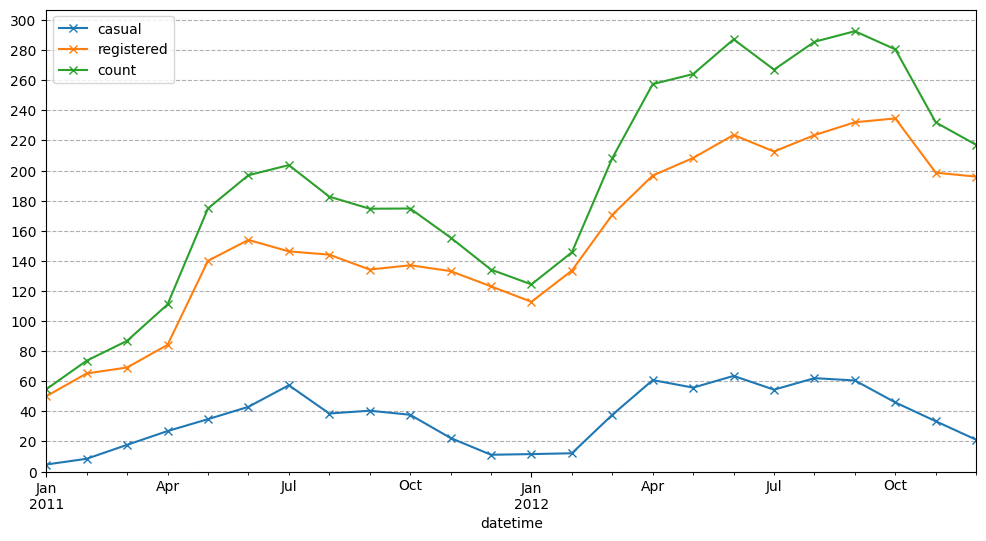

In [18]:
#creating trendline of monthly casual, registered and count column over the month time period.
# this will help us to visualise the trend of users over the time period.

plt.figure(figsize = (12, 6))

# resampling the data on monthly basis for line plot and showing mean value of above mentioned columns
df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'causal', marker = 'x')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'x')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = 'x')

plt.grid(axis = 'y', linestyle = '--')    # adding gridlines only along the y-axis
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)    # setting the lower y-axis limit to 0
plt.show()      # displaying the plot


#### Trending the total count over the monthly time period.

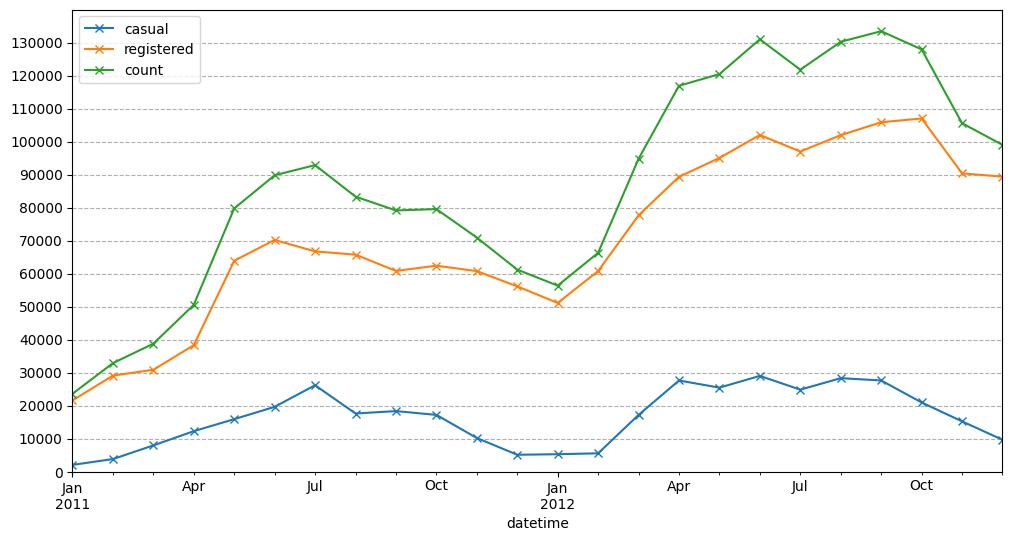

In [19]:
#creating trendline of monthly casual, registered and count column over the month time period.
# this will help us to visualise the trend of users over the time period.

plt.figure(figsize = (12, 6))

# resampling the data on monthly basis for line plot and showing mean value of above mentioned columns
df.resample('M')['casual'].sum().plot(kind = 'line', legend = 'causal', marker = 'x')
df.resample('M')['registered'].sum().plot(kind = 'line', legend = 'registered', marker = 'x')
df.resample('M')['count'].sum().plot(kind = 'line', legend = 'count', marker = 'x')

plt.grid(axis = 'y', linestyle = '--')    # adding gridlines only along the y-axis
plt.yticks(np.arange(0, 130001, 10000))
plt.ylim(0,)    # setting the lower y-axis limit to 0
plt.show()      # displaying the plot

#### Growth in count data

##### Yearly growth in count data

In [20]:
#sampling the 'count' data by the year
df1 = df.resample('Y')['count'].mean().to_frame().reset_index()

#getting the avg count of previous year
df1['prev_count'] = df1['count'].shift(1)

# calcuating the growth over the year
df1['growth'] = (df1['count'] - df1['prev_count']) * 100/ df1['prev_count']

df1

datetime       count  prev_count     growth
0 2011-12-31  144.223349         NaN        NaN
1 2012-12-31  238.560944  144.223349  65.410764

There is a 65% increase in the avg bike rental count in 2012 over the year 2011, which looks positive for the business and outcome of successful strategy implementation.

##### Monthly Growth for month over month comparisiondf.re

In [21]:
df.reset_index(inplace = True)

# Group by the month of the 'datetime' column and calculate the mean of 'count'
df1 = df.groupby(by=df['datetime'].dt.month)['count'].mean().to_frame().reset_index()

# Rename the columns for clarity
df1.rename(columns={'datetime': 'month', 'count': 'mean_count'}, inplace=True)

# Create a new column 'prev_count' by shifting the 'mean_count' column one position up
df1['prev_count'] = df1['mean_count'].shift(1)

# Calculating the growth percentage of 'mean_count' with respect to the 'mean_count' of the previous month
df1['growth_percent'] = (df1['mean_count'] - df1['prev_count']) * 100 / df1['prev_count']

# Set the index to 'month'
df1.set_index('month', inplace=True)

print(df1)

       mean_count  prev_count  growth_percent
month                                        
1       90.366516         NaN             NaN
2      110.003330   90.366516       21.730188
3      148.169811  110.003330       34.695751
4      184.160616  148.169811       24.290241
5      219.459430  184.160616       19.167406
6      242.031798  219.459430       10.285440
7      235.325658  242.031798       -2.770768
8      234.118421  235.325658       -0.513007
9      233.805281  234.118421       -0.133753
10     227.699232  233.805281       -2.611596
11     193.677278  227.699232      -14.941620
12     175.614035  193.677278       -9.326465


- we can see the growth increase from Jan-Mar and smaller growth in Apr-Jun
- Negative growth in Jul-Dec
- highest growth in Feb to Mar and largest drop in Oct to Nov

##### trendline with monthly avg bike demand

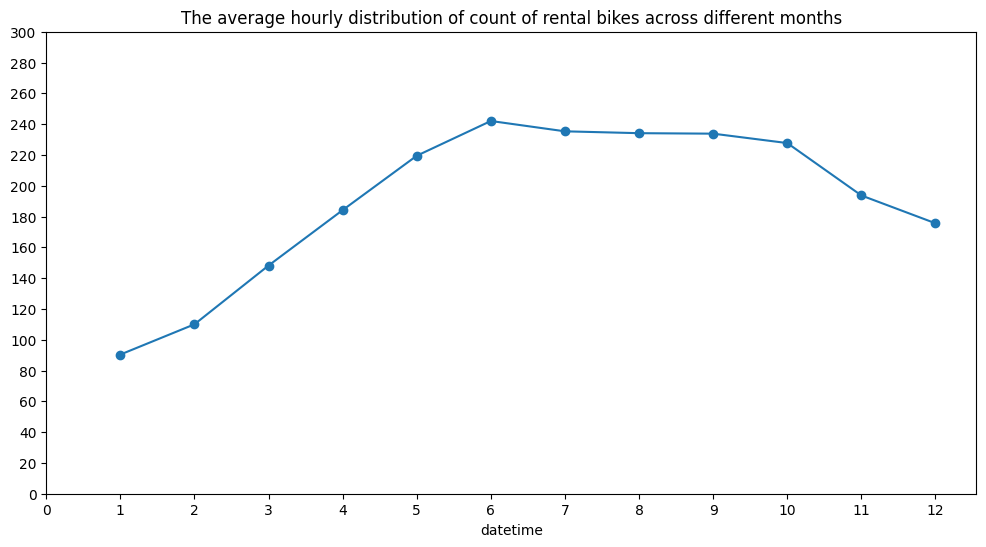

In [22]:
# Plotting this same thing as line plot
plt.figure(figsize = (12, 6))
df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')
plt.title('The average hourly distribution of count of rental bikes across different months')
plt.xticks(np.arange(0, 13, 1))
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0)
plt.show()

- Highest in Jun and then start declining
- seasonal pattern the demand of the bike rentals, which is high demand in spring and summar and start declining in the rainy season and further declines in winter seasons.

##### Hourly basis bike demand growth

In [23]:
#grouping the df dataframe data by the hour and calcuting the mean over the 'count' columns
df1 = df.groupby(by = df['datetime'].dt.hour)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'hour'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up
    # to compare the previous hour's count with the current hour's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous hour
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('hour', inplace = True)
df1

count  prev_count  growth_percent
hour                                        
0      55.138462         NaN             NaN
1      33.859031   55.138462      -38.592718
2      22.899554   33.859031      -32.367959
3      11.757506   22.899554      -48.656179
4       6.407240   11.757506      -45.505110
5      19.767699    6.407240      208.521293
6      76.259341   19.767699      285.777526
7     213.116484   76.259341      179.462793
8     362.769231  213.116484       70.221104
9     221.780220  362.769231      -38.864655
10    175.092308  221.780220      -21.051432
11    210.674725  175.092308       20.322091
12    256.508772  210.674725       21.755835
13    257.787281  256.508772        0.498427
14    243.442982  257.787281       -5.564393
15    254.298246  243.442982        4.459058
16    316.372807  254.298246       24.410141
17    468.765351  316.372807       48.168661
18    430.859649  468.765351       -8.086285
19    315.278509  430.859649      -26.825705
20    228.517544  315.278509      -27.518833
21    173.370614  228.517544      -24.132471
22    133.576754  173.370614      -22.953059
23     89.508772  133.576754      -32.990757

- During the early morning hours (hours 0 to 5), there is a significant decrease in the count, with negative growth percentages ranging from -38.59% to -48.66%.
- However, starting from hour 5, there is a sudden increase in count, with a sharp positive growth percentage of 208.52% observed from hour 4 to hour 5.
- The count continues to rise significantly until reaching its peak at hour 17, with a growth percentage of 48.17% compared to the previous hour.
- After hour 17, there is a gradual decrease in count, with negative growth percentages ranging from -8.08% to -32.99% during the late evening and nighttime hours.

[]

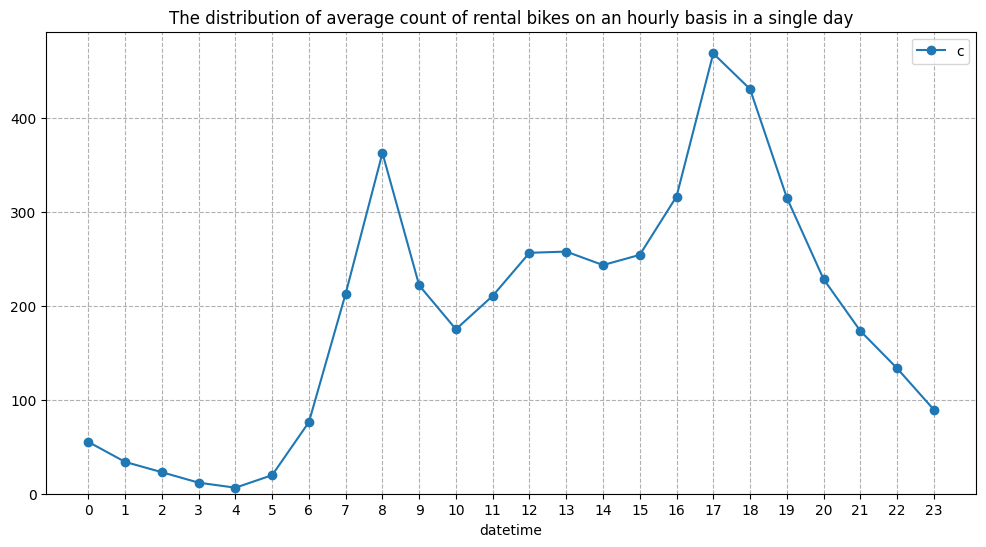

In [24]:
#try to plot the data on line plot
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

- The average count of rental bikes is the highest at 5 PM followed by 6 PM and 8 AM of the day.
- The average count of rental bikes is the lowest at 4 AM followed by 3 AM and 5 AM of the day.
- These patterns indicate that there is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

#### Basic info

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


##### Applying seasons category to that column

In [26]:
# writing a function to apply the different categories on seasons column based on the values given there

# 1: spring, 2: summer, 3: fall, 4: winter

def season_cat(x):
  if x == 1:
    return 'spring'
  elif x ==2:
    return 'summer'
  elif x ==3:
    return 'fall'
  else:
    return 'winter'

df['season'] = df['season'].apply(season_cat)

In [27]:
df.head(2) # just to check the changes in the season column

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00  spring        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00  spring        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count       day  
0        81        0.0       3          13     16  Saturday  
1        80        0.0       8          32     40  Saturday

##### Changing the datatype of columns

In [28]:
df.dtypes

datetime      datetime64[ns]
season                object
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
day                   object
dtype: object

In [29]:
#changing the datatype of the columns as per the nature of the values

#converting below to category column
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

#converting below to float columns
df['temp'] = df['temp'].astype('float32')
df['atemp'] = df['atemp'].astype('float32')
df['humidity'] = df['humidity'].astype('int8')
df['windspeed'] = df['windspeed'].astype('float32')
df['casual'] = df['casual'].astype('int16')
df['registered'] = df['registered'].astype('int16')
df['count'] = df['count'].astype('int16')

#some datatype don't need to be changed but I have created some datatypes to reduce the size of the data.

In [30]:
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float32
atemp                float32
humidity                int8
windspeed            float32
casual                 int16
registered             int16
count                  int16
day                   object
dtype: object

##### Data describe

In [31]:
df.describe()

datetime          temp         atemp  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968     20.230862     23.655085   
min              2011-01-01 00:00:00      0.820000      0.760000   
25%              2011-07-02 07:15:00     13.940000     16.665001   
50%              2012-01-01 20:30:00     20.500000     24.240000   
75%              2012-07-01 12:45:00     26.240000     31.059999   
max              2012-12-19 23:00:00     41.000000     45.455002   
std                              NaN      7.791590      8.474601   

           humidity     windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  
mean      61.886460     12.799396     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%       47.000000      7.001500      4.000000     36.000000     42.000000  
50%       62.000000     12.998000     17.000000    118.000000    145.000000  
75%       77.000000     16.997900     49.000000    222.000000    284.000000  
max      100.000000     56.996899    367.000000    886.000000    977.000000  
std       19.245033      8.164537     49.960477    151.039033    181.144454

In [32]:
df.describe(include = ['category', 'object'])

season  holiday  workingday  weather       day
count    10886    10886       10886    10886     10886
unique       4        2           2        4         7
top     winter        0           1        1  Saturday
freq      2734    10575        7412     7192      1584

#### Analyzing the categorical data

##### season distribution

In [33]:
#first create the % df for all the seasons
df_season = (np.round(df['season'].value_counts(normalize = True)*100,2)).to_frame()
df_season.columns = ['percentage']
df_season

percentage
season            
winter       25.11
fall         25.11
summer       25.11
spring       24.67

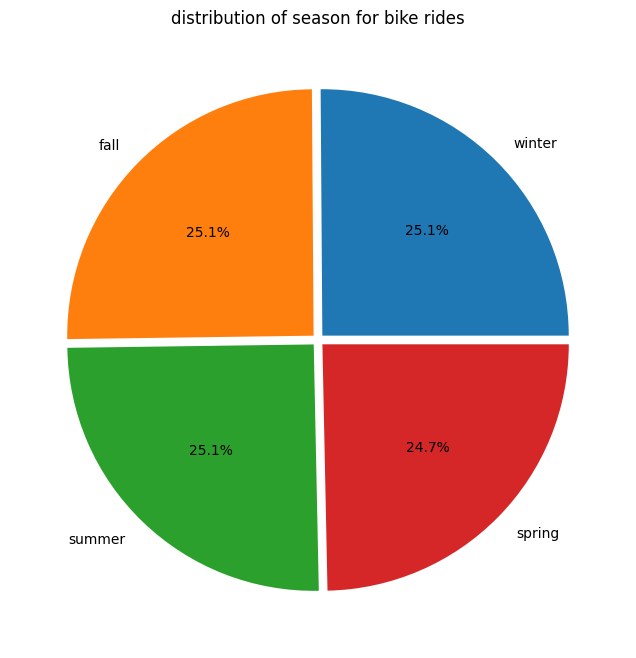

In [34]:
#Now using the above df to create the pie chart
plt.figure(figsize = (10,8))
plt.title('distribution of season for bike rides')
plt.pie(x = df_season['percentage'],
        labels = df_season.index,
        explode = [0.025, 0.025, 0.025, 0.025],
        autopct = '%.1f%%')
plt.show()

- we can see that all the season contribute almost equally in the bike ride counts.

##### Holiay distribution for bike rides

In [35]:
df_holiday = np.round(df['holiday'].value_counts(normalize = True)*100).to_frame()
df_holiday.columns = ['percentage']
df_holiday

percentage
holiday            
0              97.0
1               3.0

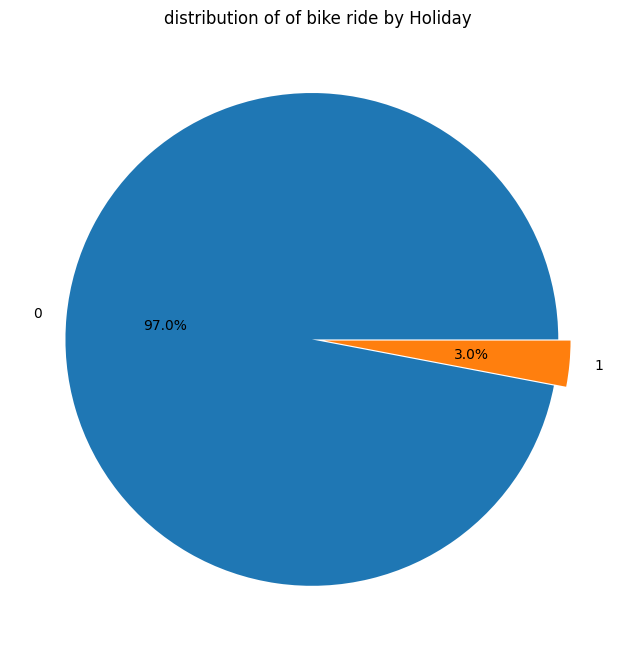

In [36]:
#creating the pie chart
#Now using the above df to create the pie chart
plt.figure(figsize = (10,8))
plt.title('distribution of of bike ride by Holiday')
plt.pie(x = df_holiday['percentage'],
        labels = df_holiday.index,
        explode = [0.025, 0.025],
        autopct = '%.1f%%')
plt.show()

- Most of the bike rides happens on non-holiday days i.e. 97%

##### working day distribution

            percentage
workingday            
1                 68.0
0                 32.0


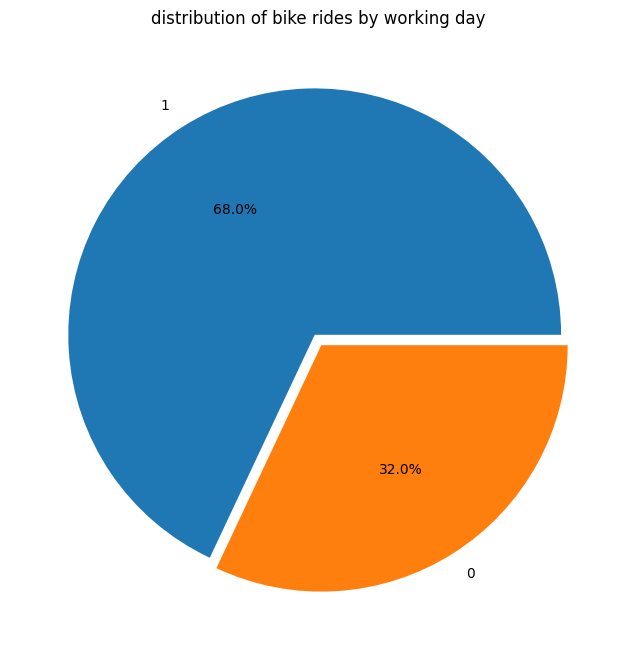

In [37]:
df_workingday = np.round(df['workingday'].value_counts(normalize = True)*100).to_frame()
df_workingday.columns = ['percentage']
print(df_workingday)

#creating the pie chart
#Now using the above df to create the pie chart
plt.figure(figsize = (10,8))
plt.title('distribution of bike rides by working day')
plt.pie(x = df_workingday['percentage'],
        labels = df_workingday.index,
        explode = [0.025, 0.025],
        autopct = '%.1f%%')
plt.show()

- 68% of bike rides happens on working day and remaining 38% happens on non-working day that means holiday or weekends as mentioned in column profiling section.

##### weather distribution

         percentage
weather            
1             66.07
2             26.03
3              7.89
4              0.01


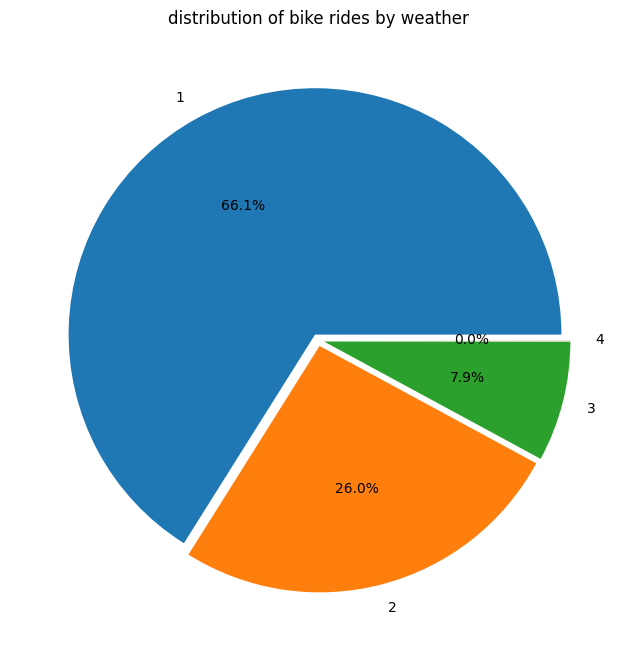

In [38]:
df_weather = np.round(df['weather'].value_counts(normalize = True)*100, 2).to_frame()
df_weather.columns = ['percentage']
print(df_weather)

#creating the pie chart
#Now using the above df to create the pie chart
plt.figure(figsize = (10,8))
plt.title('distribution of bike rides by weather')
plt.pie(x = df_weather['percentage'],
        labels = df_weather.index,
        explode = [0.025, 0.025, 0.025, 0.025],
        autopct = '%.1f%%')
plt.show()

weather:
- 1: Clear, Few clouds, partly cloudy, partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- Most of the rides i.e. around 66% happens on the clear or cloudy day
- then on misty day it is ~ 26%
- on a lightly raining day it is ~8%
- when it rains heavily the business is zero.

So we can say weather plays a key role in the bike ride counts.

### Univariate Analysis

##### season

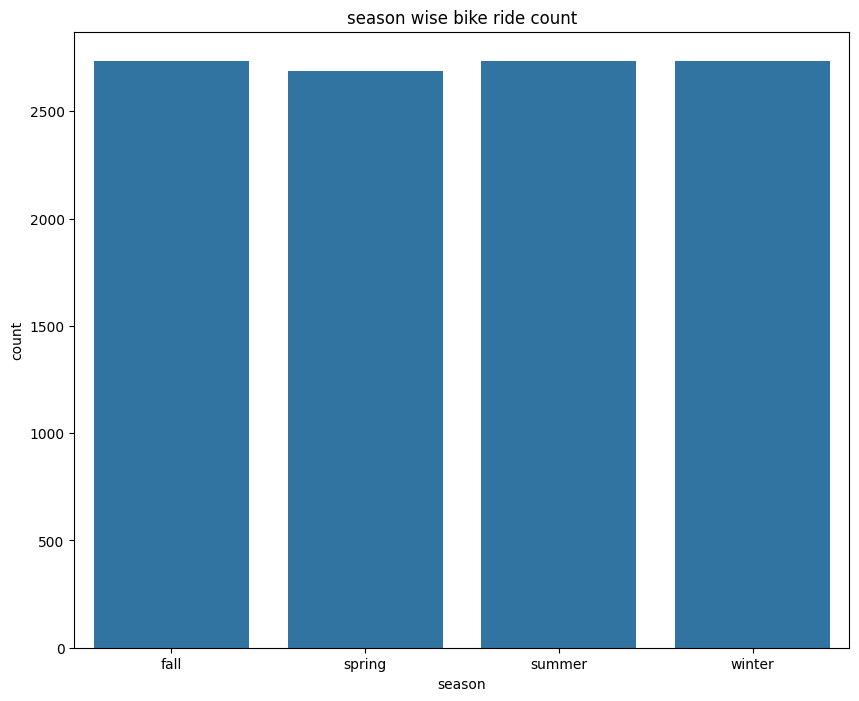

In [39]:
#countplot of the season

plt.figure(figsize = (10,8))
sns.countplot(x = df['season'], data = df)
plt.title('season wise bike ride count')
plt.show()

##### holiday

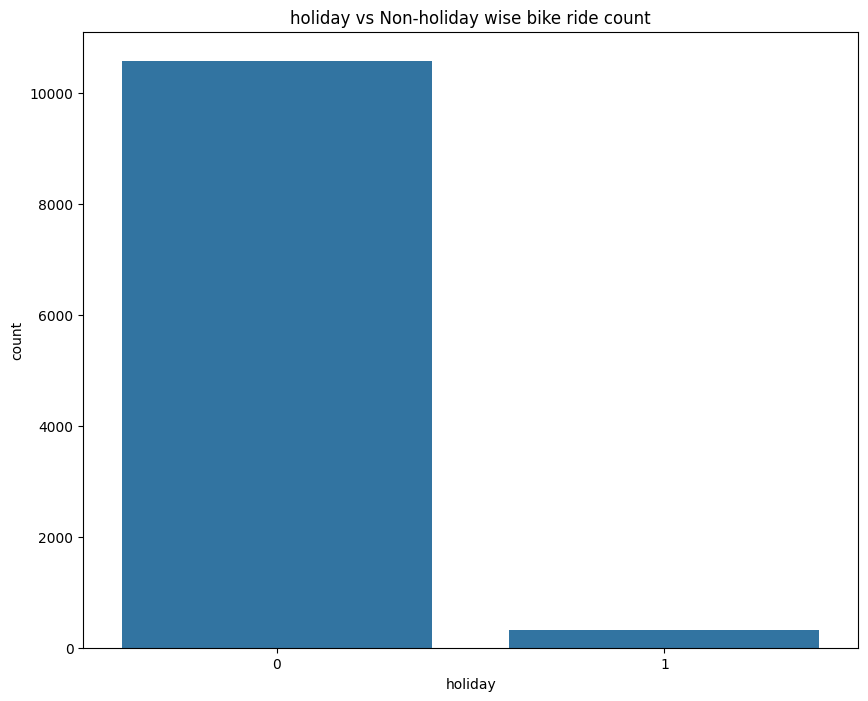

In [40]:
#countplot

plt.figure(figsize = (10,8))
sns.countplot(x = df['holiday'], data = df)
plt.title('holiday vs Non-holiday wise bike ride count')
plt.show()

##### working day

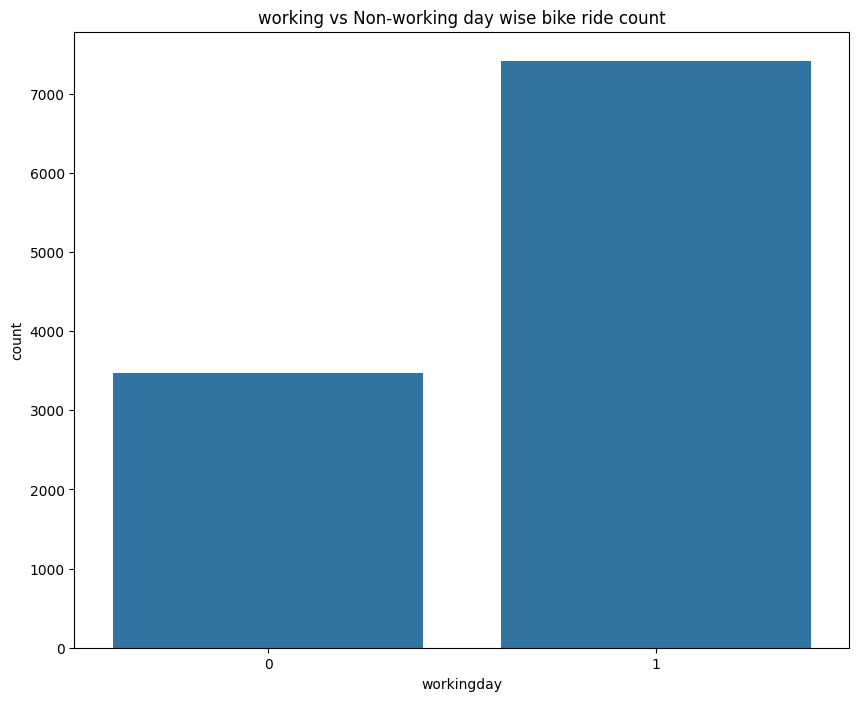

In [41]:
#countplot

plt.figure(figsize = (10,8))
sns.countplot(x = df['workingday'], data = df)
plt.title('working vs Non-working day wise bike ride count')
plt.show()

##### weather

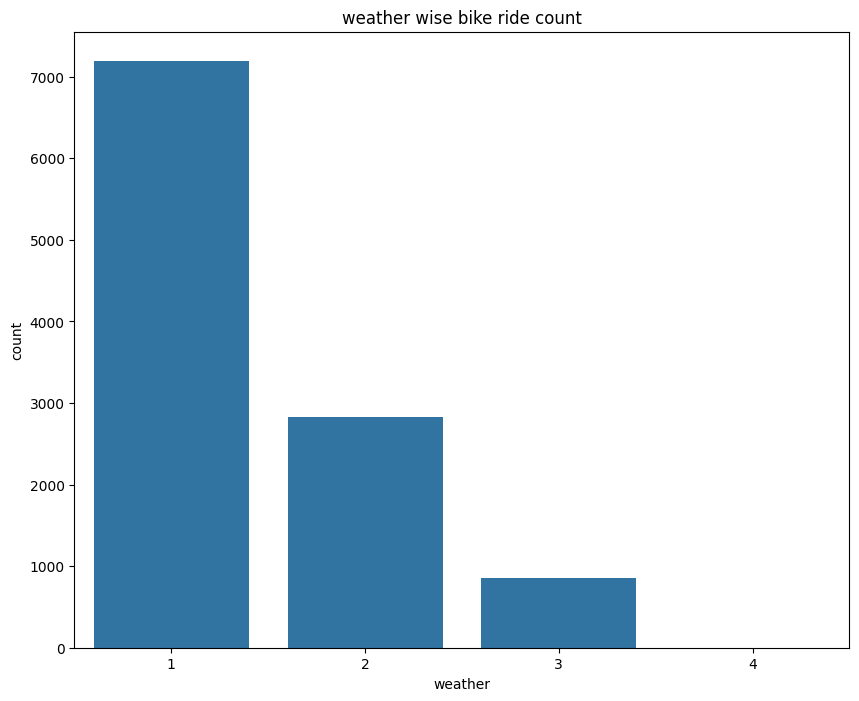

In [42]:
#countplot

plt.figure(figsize = (10,8))
sns.countplot(x = df['weather'], data = df)
plt.title('weather wise bike ride count')
plt.show()

##### temprature data - temp

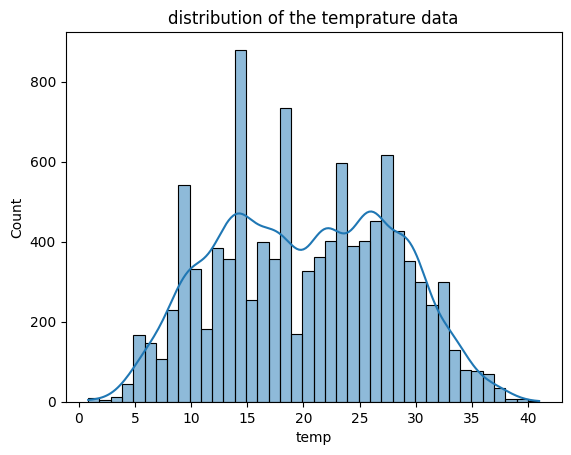

In [43]:
#creating a histogram for the temprature data so that we can see its distribution
# adding kde as well to the plot to visualise the shape of the distribution better

sns.histplot(x = df['temp'], data = df, kde = True, bins = 40)
plt.title('distribution of the temprature data')
plt.show()

In [44]:
#mean and std of temp data
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std

(20.23, 7.79)

Mean and std dev of the temprature data is 20.23 Degree C and 7.79 Degree C respectively.

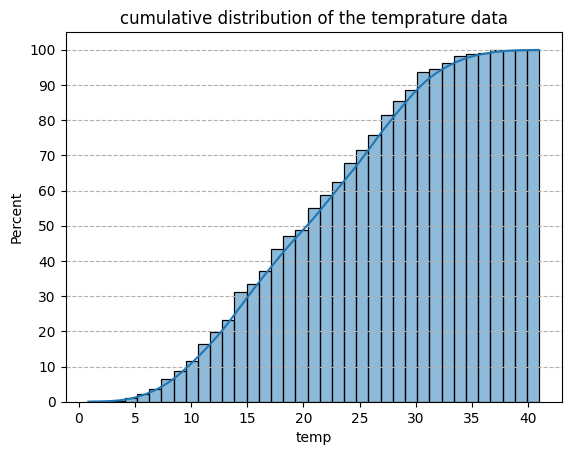

In [45]:
#generating cumulative distribution of the same dataset - temprature in the percentage

sns.histplot(x = df['temp'], data = df, kde = True, cumulative = True, stat = 'percent')
plt.yticks(np.arange(0, 101, 10)) # This will divide the y-axis in step of 10 from 0 to 100
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.title('cumulative distribution of the temprature data')
plt.show()

- from above we can see that 80% of time temp is less than 28 Degree C

##### atemp data

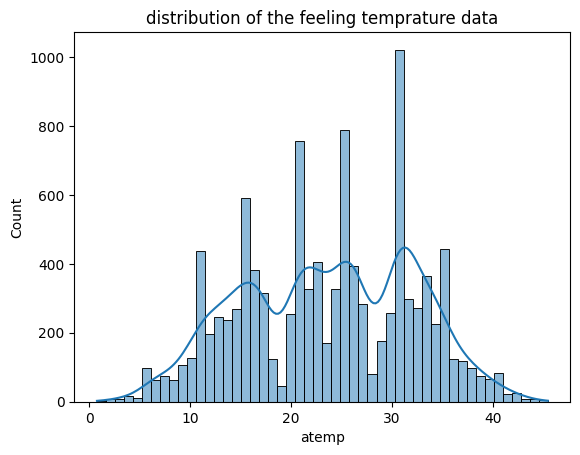

In [46]:
#creating a histogram for the feeling temprature data so that we can see its distribution
# adding kde as well to the plot to visualise the shape of the distribution better

sns.histplot(x = df['atemp'], data = df, kde = True, bins = 50)
plt.title('distribution of the feeling temprature data')
plt.show()

In [47]:
#mean and std of temp data
temp_mean = np.round(df['atemp'].mean(), 2)
temp_std = np.round(df['atemp'].std(), 2)
temp_mean, temp_std

(23.66, 8.47)

mean feeling temp is 23.66 Degree C and standard deviation is 8.47 Degree C

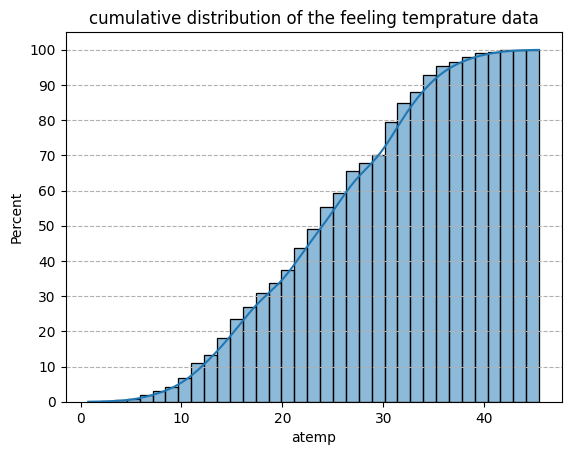

In [48]:
#generating cumulative distribution of the same dataset - feeling temprature in the percentage

sns.histplot(x = df['atemp'], data = df, kde = True, cumulative = True, stat = 'percent')
plt.yticks(np.arange(0, 101, 10)) # This will divide the y-axis in step of 10 from 0 to 100
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.title('cumulative distribution of the feeling temprature data')
plt.show()

- 80% of the values of feeled temprature is above 14 Degree C

##### Humidity

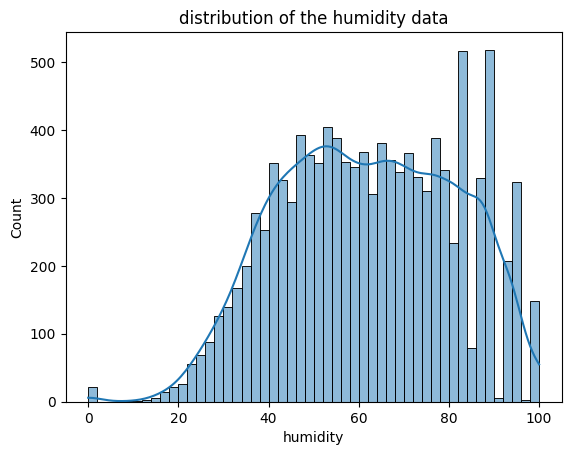

In [49]:
#creating a histogram for the humidity data so that we can see its distribution
# adding kde as well to the plot to visualise the shape of the distribution better

sns.histplot(x = df['humidity'], data = df, kde = True, bins = 50)
plt.title('distribution of the humidity data')
plt.show()

In [50]:
#mean and std of humidity
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std

(61.89, 19.25)

mean humidity is ~62% and std dev is 19.25.

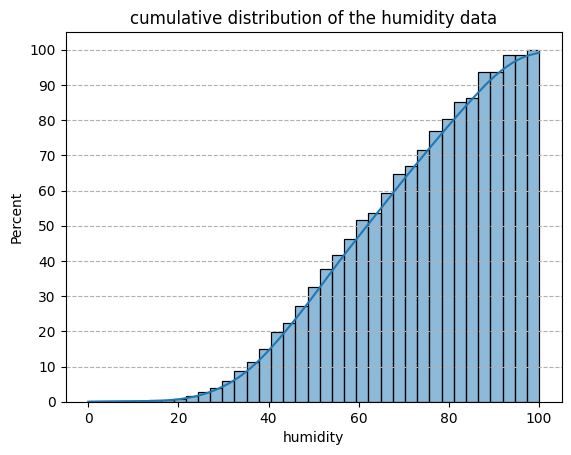

In [51]:
#generating cumulative distribution of the same dataset - temprature in the percentage

sns.histplot(x = df['humidity'], data = df, kde = True, cumulative = True, stat = 'percent')
plt.yticks(np.arange(0, 101, 10)) # This will divide the y-axis in step of 10 from 0 to 100
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.title('cumulative distribution of the humidity data')
plt.show()

More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

##### Widnspeed

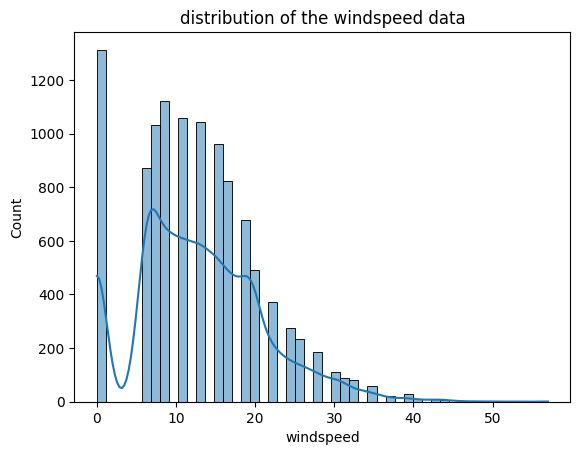

In [52]:
#creating a histogram for data so that we can see its distribution
# adding kde as well to the plot to visualise the shape of the distribution better

sns.histplot(x = df['windspeed'], data = df, kde = True, bins = 50)
plt.title('distribution of the windspeed data')
plt.show()

In [53]:
#mean and std devistion
windspeed_mean = np.round(df['windspeed'].mean(), 2)
windspeed_std = np.round(df['windspeed'].std(), 2)
windspeed_mean, windspeed_std

(12.8, 8.16)

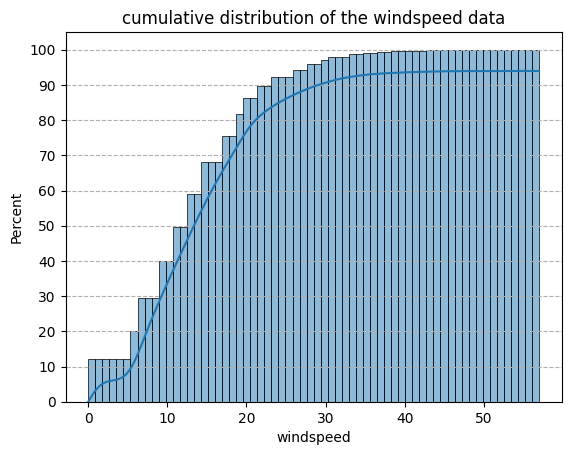

In [54]:
#generating cumulative distribution of the same dataset in the percentage

sns.histplot(x = df['windspeed'], data = df, kde = True, cumulative = True, stat = 'percent')
plt.yticks(np.arange(0, 101, 10)) # This will divide the y-axis in step of 10 from 0 to 100
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.title('cumulative distribution of the windspeed data')
plt.show()


 - More than 85 % of the total windspeed data has a value of less than 20.

In [55]:
len(df[df['windspeed'] < 20]) *100 / len(df)

86.26676465184642

##### Casual bike rides

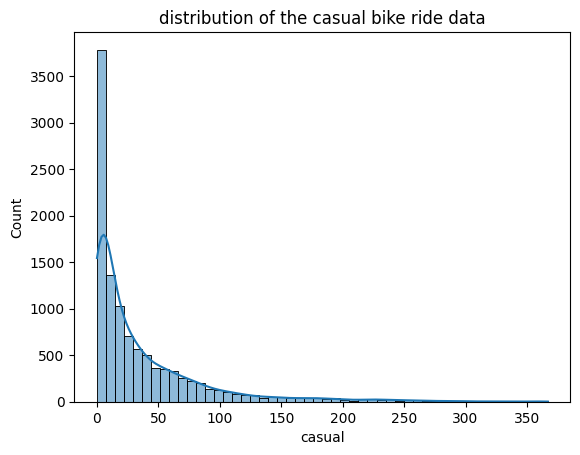

In [56]:
#creating a histogram for data so that we can see its distribution
# adding kde as well to the plot to visualise the shape of the distribution better

sns.histplot(x = df['casual'], data = df, kde = True, bins = 50)
plt.title('distribution of the casual bike ride data')
plt.show()

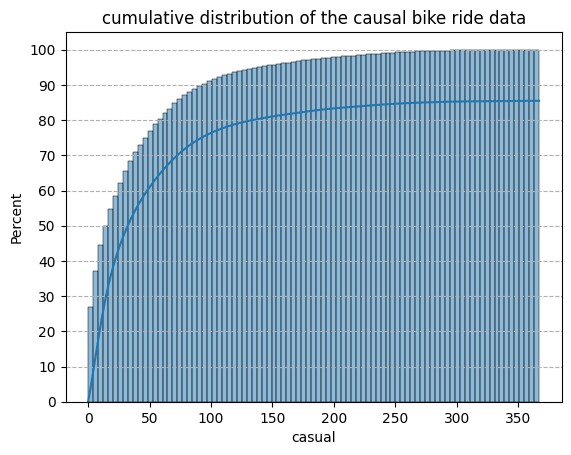

In [57]:
#generating cumulative distribution of the same dataset in the percentage

sns.histplot(x = df['casual'], data = df, kde = True, cumulative = True, stat = 'percent')
plt.yticks(np.arange(0, 101, 10)) # This will divide the y-axis in step of 10 from 0 to 100
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.title('cumulative distribution of the causal bike ride data')
plt.show()

 - More than 80 % of the time, the count of casual users is less than 60.

##### Registered users

In [58]:
df.head(2)

datetime  season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  spring       0          0       1  9.84  14.395   
1 2011-01-01 01:00:00  spring       0          0       1  9.02  13.635   

   humidity  windspeed  casual  registered  count       day  
0        81        0.0       3          13     16  Saturday  
1        80        0.0       8          32     40  Saturday

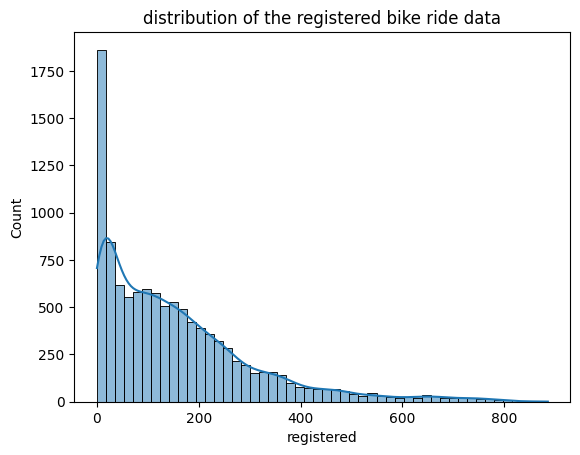

In [59]:
#creating a histogram for data so that we can see its distribution
# adding kde as well to the plot to visualise the shape of the distribution better

sns.histplot(x = df['registered'], data = df, kde = True, bins = 50)
plt.title('distribution of the registered bike ride data')
plt.show()

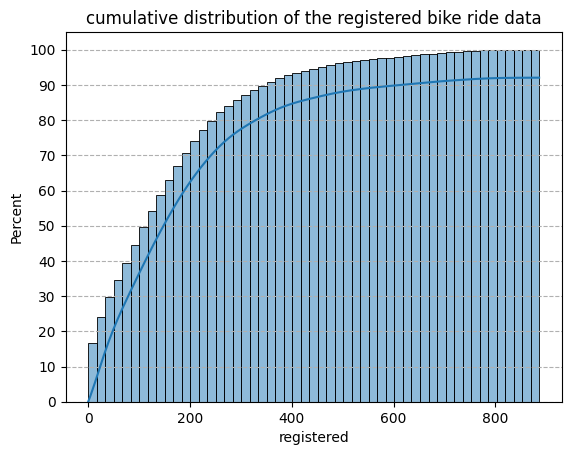

In [60]:
#generating cumulative distribution of the same dataset in the percentage

sns.histplot(x = df['registered'], data = df, kde = True, cumulative = True, stat = 'percent')
plt.yticks(np.arange(0, 101, 10)) # This will divide the y-axis in step of 10 from 0 to 100
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.title('cumulative distribution of the registered bike ride data')
plt.show()

- More than 85 % of the time, the count of registered users is less than 300.

#### Outlier Detection

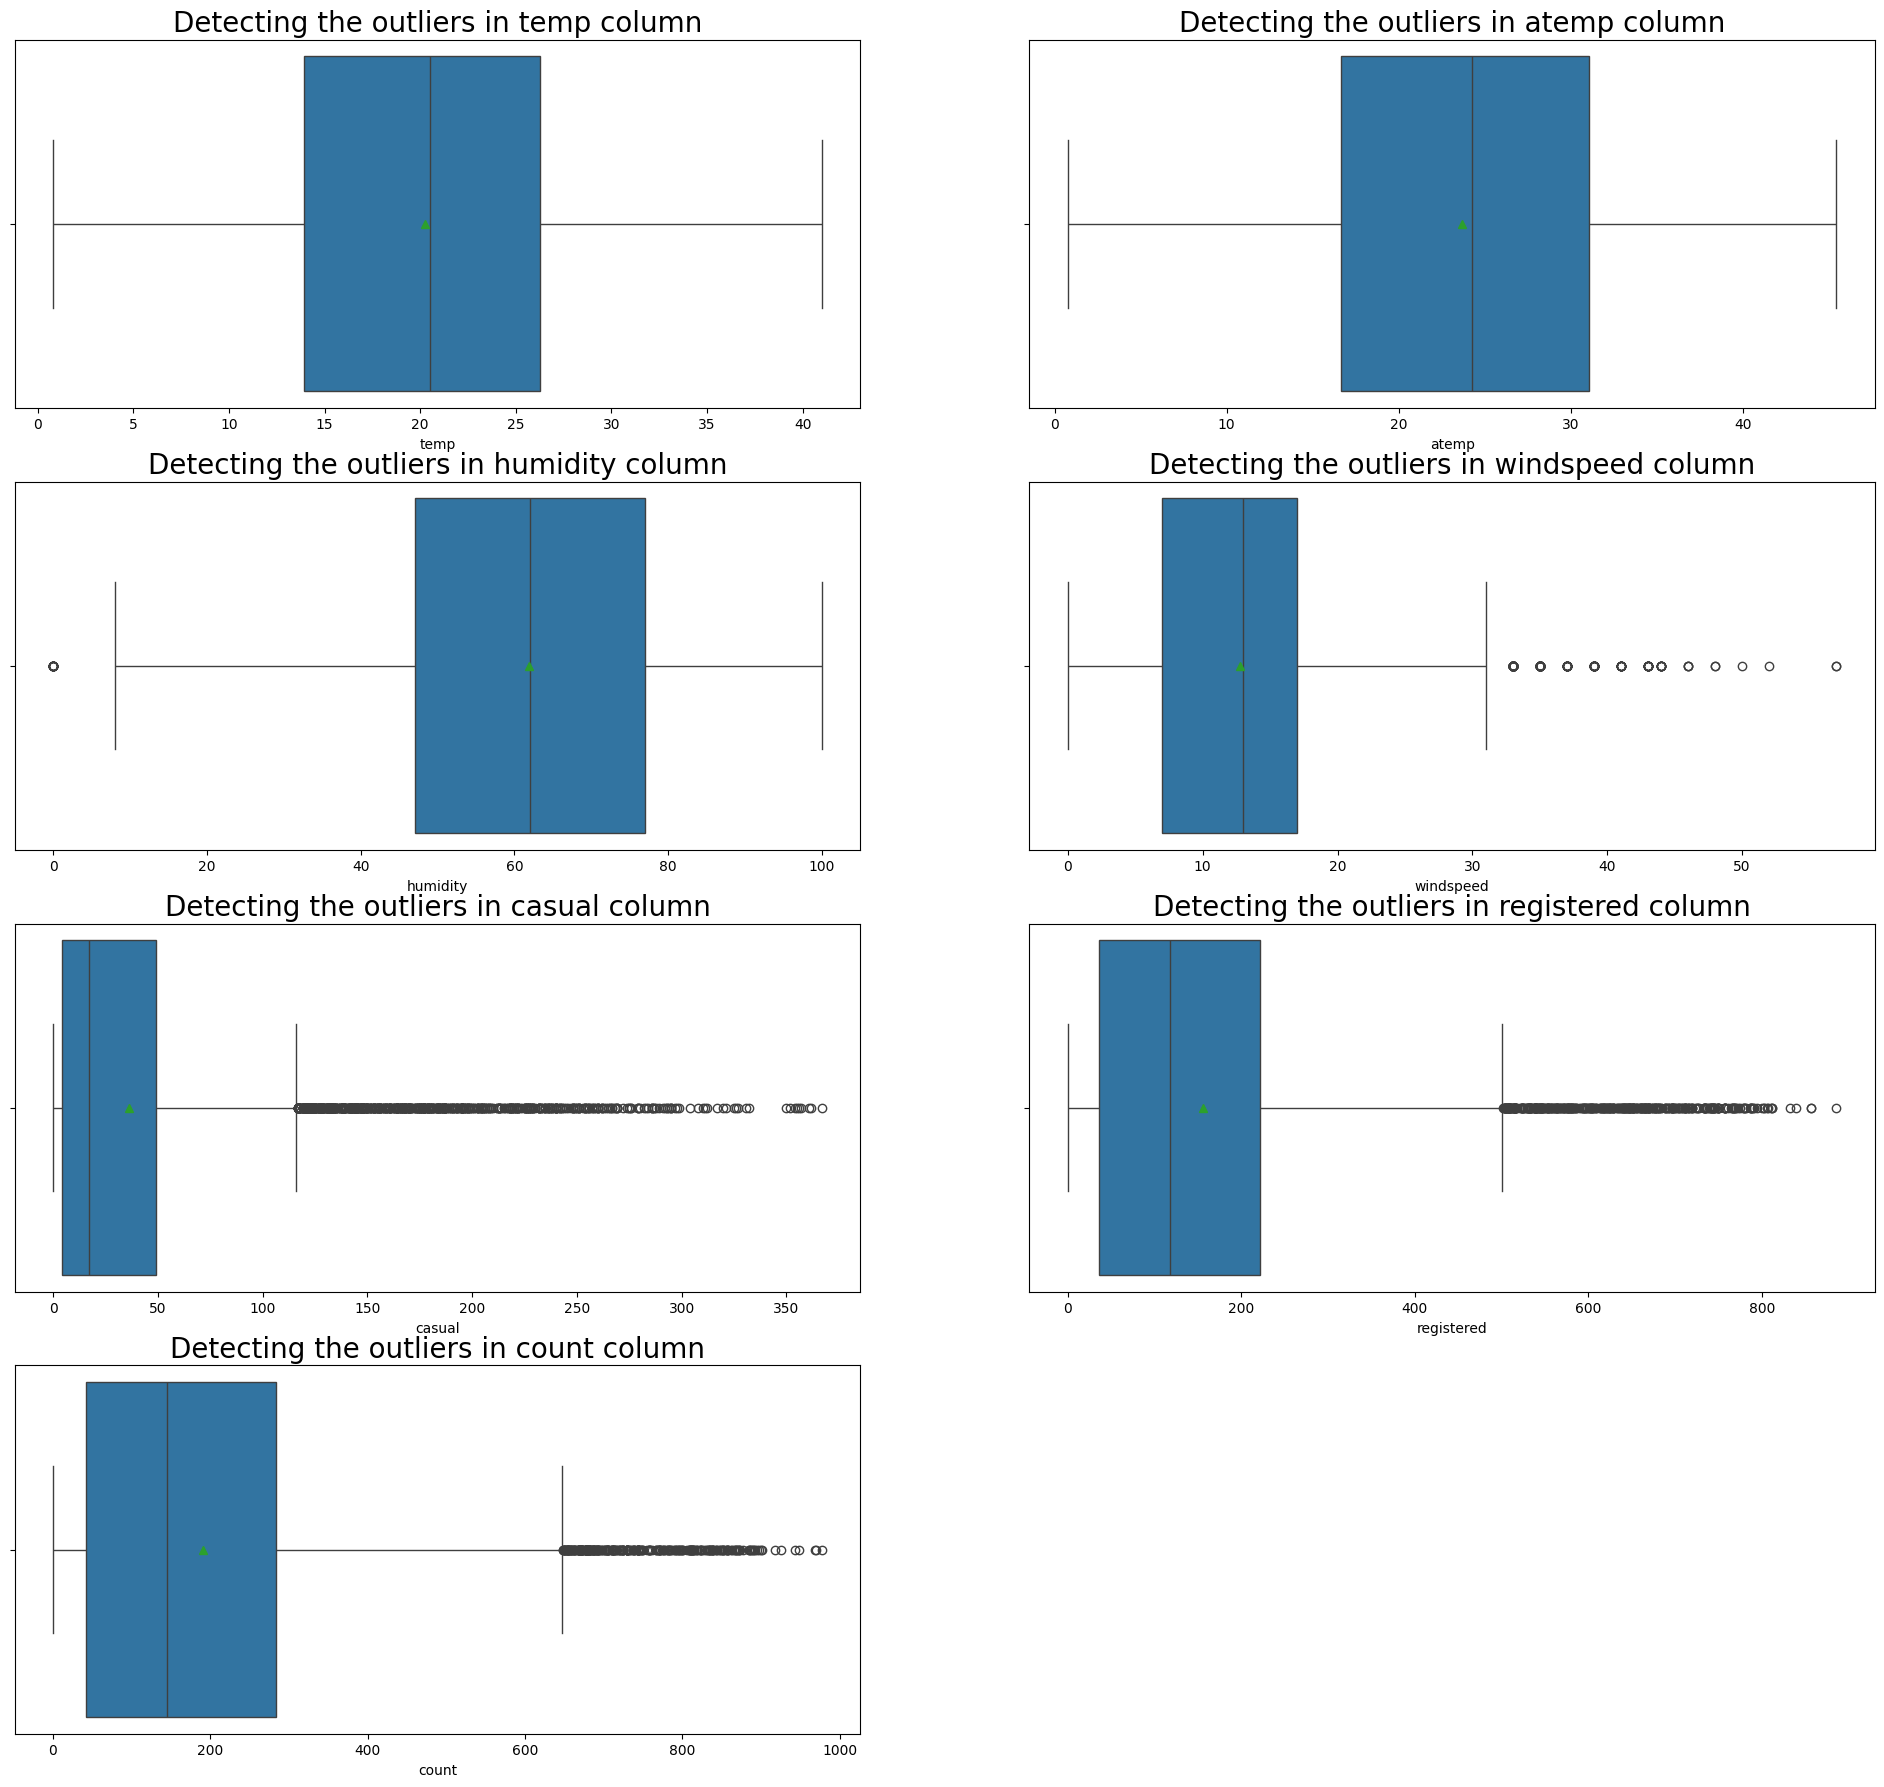

In [61]:
#taking all the numerical columns for the outlier detection

columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
count = 1
plt.figure(figsize = (24, 22))
for i in columns:
  plt.subplot(4, 2 ,count)
  sns.boxplot(x = df[i], data = df, showmeans = True) #plotting the box plot with mean showing on box plot
  plt.title(f'Detecting the outliers in {i} column', size = 20)
  plt.plot()
  count += 1

- Majorly We have outliers present in the windspeed, casual, registered and total user count of the bike riders.
- There are a few outliers present in the humidity column as well.

### Bi-variate Analysis

#### Distribution of bike ride counts across seasons

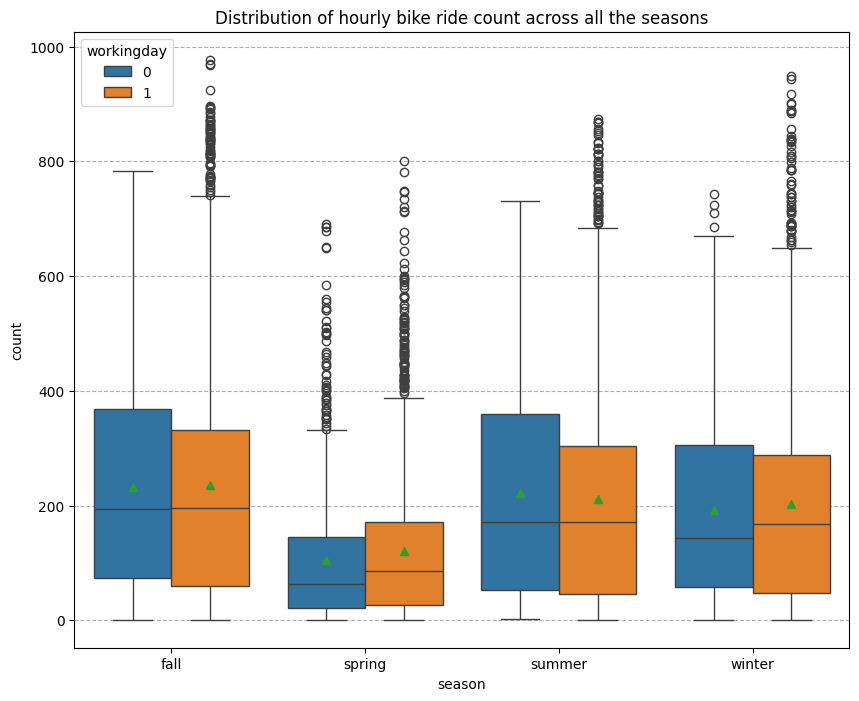

In [62]:
#box plot of the bike ride count across multiple seasons and
#we will use the working/non-working day as the hue to disnguish between the demand for same season on different type of days

plt.figure(figsize = (10,8))
sns.boxplot(x = df['season'], y = df['count'], data = df, hue = df['workingday'], showmeans = True)
plt.title('Distribution of hourly bike ride count across all the seasons')
plt.grid( axis = 'y', linestyle = '--')
plt.show()

 - The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

#### Distribution of bike ride counts across weather

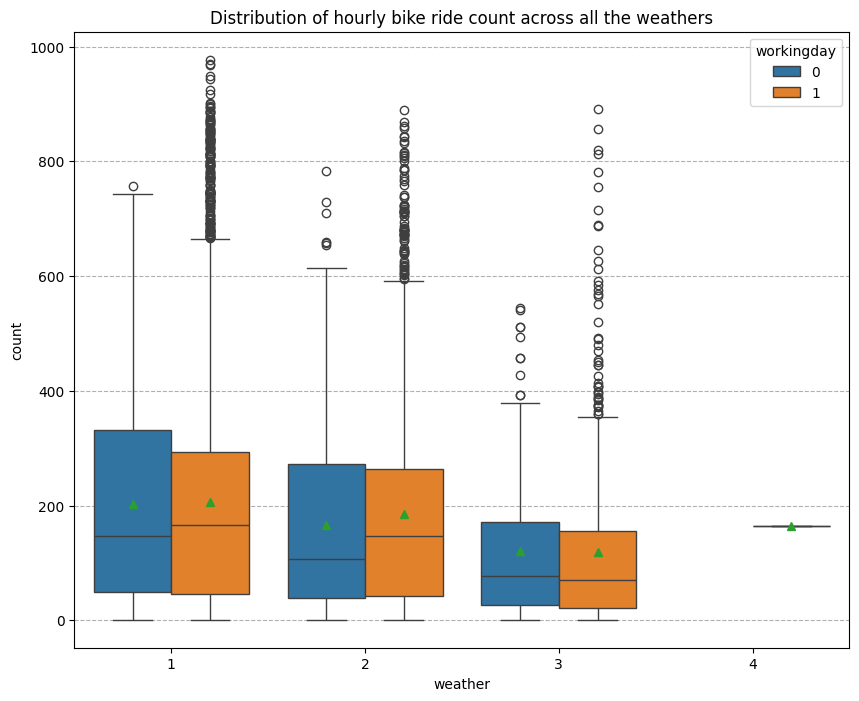

In [63]:
#box plot of the bike ride count across multiple weather and
#we will use the working/non-working day as the hue to disnguish between the demand for same season on different type of days

plt.figure(figsize = (10,8))
sns.boxplot(x = df['weather'], y = df['count'], data = df, hue = df['workingday'], showmeans = True)
plt.title('Distribution of hourly bike ride count across all the weathers')
plt.grid( axis = 'y', linestyle = '--')
plt.show()

- The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

## Hypothesis Testing

### 1) Is there any Impact of working day on the bike rented.

In [64]:
#checking the major statistics around the working day for bike rentals

df.groupby(df['workingday'])['count'].describe()

count        mean         std  min   25%    50%    75%    max
workingday                                                                
0           3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0
1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0

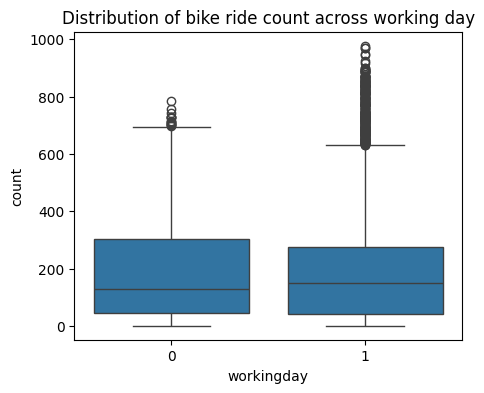

In [65]:
#box plot

plt.figure(figsize = (5, 4))
sns.boxplot(x = df['workingday'], y = df['count'], data = df)
plt.title('Distribution of bike ride count across working day')
plt.show()

#### Steps

Step -1 : Set-up the Hypothesis
- Null Hypothesis (Ho) : Working day/ Non-working day don't have any impact on the bike rentals
- Alternative Hypothesis (Ha) : Working day has some impact on the bike rentals

Step-2 : Checking on the assumptions
- Normality - check whether our data is normal or not by applying the few test - check visually by plotting the histogram or QQ test or Shapiro test
- Equal variance using the levene's test

Step-3: Define the Test statistics and distribution of T under Ho
- f the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

Step-4 : compute the p-value and do the hypothesis test for alpha = 0.05


#### Checking for normality

##### Visual Analysis

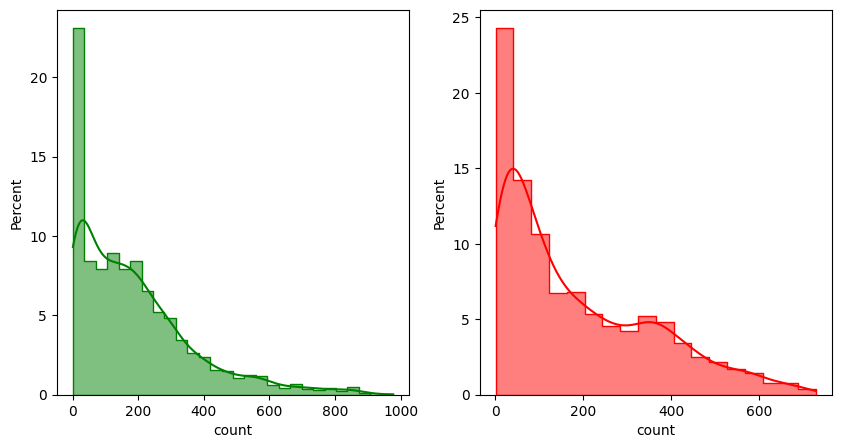

In [66]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
#histogram from random sample of value with working day equal to 1 to check for distribution
sns.histplot(df.loc[df['workingday'] ==  1]['count'].sample(2000), element = 'step', kde = True, stat = 'percent',
             color = 'green', label = 'working day')

plt.subplot(1, 2, 2)
#histogram from random sample of value with non- working day equal to 1 to check for distribution
sns.histplot(df.loc[df['workingday'] != 1]['count'].sample(2000), element = 'step', kde = True, stat = 'percent',
             color = 'red', label = 'non-working day')
plt.show()

- for both working and non-working histogram, we can say that both doesn't follow the normal distribution

##### QQ plot

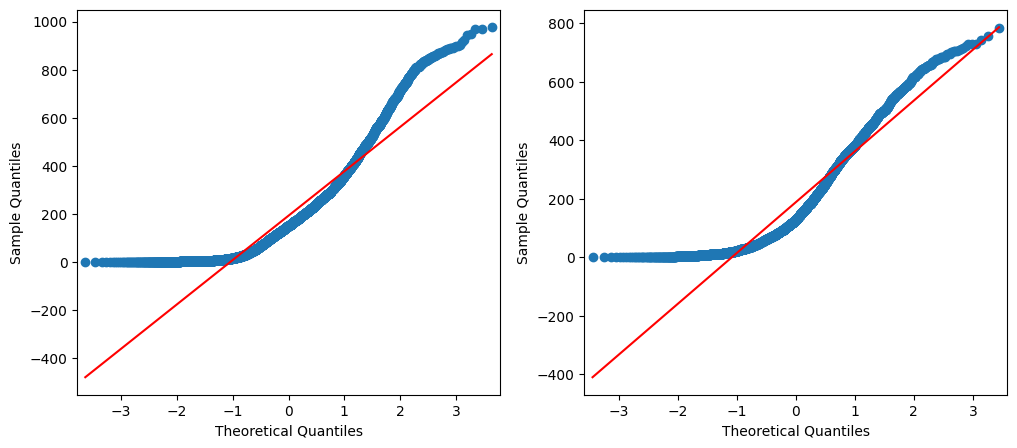

In [67]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)
#plotting the qq plot for the working day
sm.qqplot(df.loc[df['workingday'] == 1]['count'], line = 's', ax = ax)

ax = fig.add_subplot(122)
#plotting the qq plot for the non-working day
sm.qqplot(df.loc[df['workingday'] != 1]['count'], line = 's', ax = ax)
plt.show()

- From above as we can see the plot doesn't align with the red line which represents the normal distribution so we can infer that doesn't follow the Normal distribution

##### Checking Normality via Shapiro-wilk test

Assuming the Hypothesis for Shapiro test
- Ho - The sample follow the Normal distribution
- Ha - The sample doesn't follow the Normal distribution

In [68]:
#importing the required library for the Shapiro test
from scipy.stats import shapiro

# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking working data sample and running the test on that
working = df.loc[df['workingday'] == 1]['count'].sample(2000)
test_stat, p_value = shapiro(working)

print(p_value)

#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

5.255429312188285e-37
Reject the null hypothesis


In [69]:
# fixing the random seed, so the sample taken remains same if we re-run
np.random.seed(42)

# taking working data sample and running the test on that
non_working = df.loc[df['workingday'] != 1]['count'].sample(2000)
test_stat, p_value = shapiro(non_working)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

3.49906011235631e-36
Reject the null hypothesis


So we can say that sample of both working and non-working data doesn't follow the normal distribution.

##### Using box-cox to normalise the data

In [70]:
from scipy.stats import boxcox

transformed_working, best_lambda = boxcox(working)
test_stat, p_value = shapiro(transformed_working)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.0532853044746e-17
Reject the null hypothesis


In [71]:
transformed_non_working, best_lambda = boxcox(non_working)
test_stat, p_value = shapiro(transformed_non_working)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

3.504070416289369e-17
Reject the null hypothesis


- Even after applying the boxcox transformation, the data is not normal, which we can verify from below.

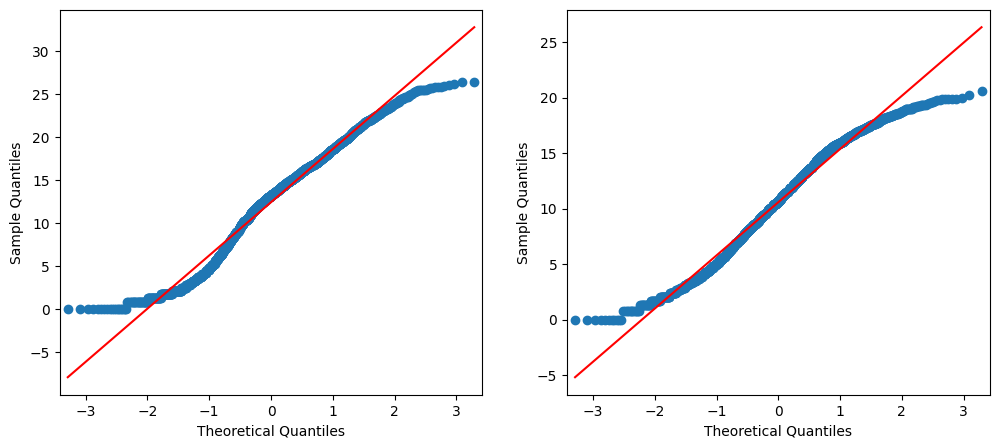

In [72]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)
#plotting the qq plot for the working day
sm.qqplot(transformed_working, line = 's', ax = ax)

ax = fig.add_subplot(122)
#plotting the qq plot for the non-working day
sm.qqplot(transformed_non_working, line = 's', ax = ax)
plt.show()

#### Checking for variance

##### levene test

In [73]:
#checking the homgenity of the variance using the levene test

from scipy.stats import levene

# Null Hypothesis Ho - homogeneous variance
# Alternate Hypothesis Ha - Non- homogenous variance

test_stat, p_value = levene(working, non_working)

print(p_value)

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.14254343410062498
Accept the null hypothesis


Since we were not able to reject Hypothesis so that we can say that there is homogenous variance in the data.

#### Alternate to T-test

Since the samples are not normally distributed we can not apply the independent t-test, so we will apply its alternative

##### Mann-Whitney U rank test

In [74]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

from scipy.stats import mannwhitneyu
test_stat, p_value = mannwhitneyu(working, non_working)

print(p_value)
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.11886477208318344
Accept the null hypothesis


#### Final Hypothesis

**So we can say that Mean no.of electric cycles rented is same for working and non-working days**

### 2) Is there any Impact of holiday on the bike rented.

In [75]:
#checking the major statistics around the working day for bike rentals

df.groupby(df['holiday'])['count'].describe()

count        mean         std  min   25%    50%    75%    max
holiday                                                                 
0        10575.0  191.741655  181.513131  1.0  43.0  145.0  283.0  977.0
1          311.0  185.877814  168.300531  1.0  38.5  133.0  308.0  712.0

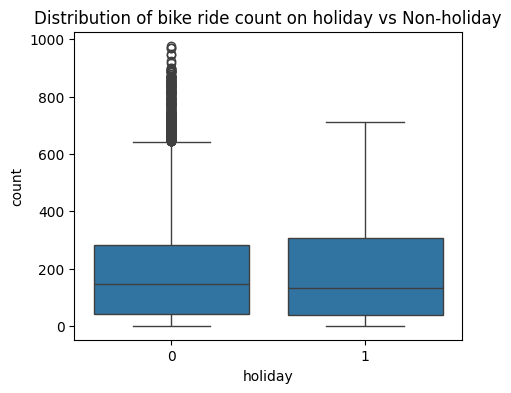

In [76]:
#box plot

plt.figure(figsize = (5, 4))
sns.boxplot(x = df['holiday'], y = df['count'], data = df)
plt.title('Distribution of bike ride count on holiday vs Non-holiday')
plt.show()

#### Steps

Step -1 : Set-up the Hypothesis
- Null Hypothesis (Ho) : Holidayy doesn't have any impact on the bike rentals
- Alternative Hypothesis (Ha) : Holiday has some impact on the bike rentals

Step-2 : Checking on the assumptions
- Normality - check whether our data is normal or not by applying the few test - check visually by plotting the histogram or QQ test or Shapiro test
- Equal variance using the levene's test

Step-3: Define the Test statistics and distribution of T under Ho
- f the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

Step-4 : compute the p-value and do the hypothesis test for alpha = 0.05


#### Checking for normality

##### Visual Analysis

In [77]:
#Fixing the see so the sample remains the same during the whole analysis.
np.random.seed(40)

#filtering the data based on the holiday and non-holiday requirement
holiday = df.loc[df['holiday'] == 1]['count']
non_holiday = df.loc[df['holiday'] != 1]['count']

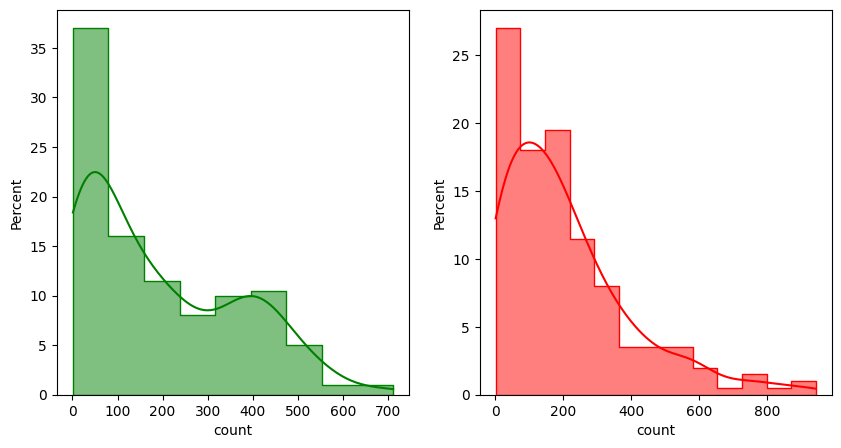

In [78]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
#histogram from random sample of value with holiday equal to 1 to check for distribution
sns.histplot(holiday.sample(200), element = 'step', kde = True, stat = 'percent',color = 'green', label = 'holiday')

plt.subplot(1, 2, 2)
#histogram from random sample of value with non-holiday equal to 1 to check for distribution
sns.histplot(non_holiday.sample(200), element = 'step', kde = True, stat = 'percent', color = 'red', label = 'non-holiday')
plt.show()

- for both holiday and non-holiday histogram, we can say that both doesn't follow the normal distribution, it is right skewed.

##### QQ plot

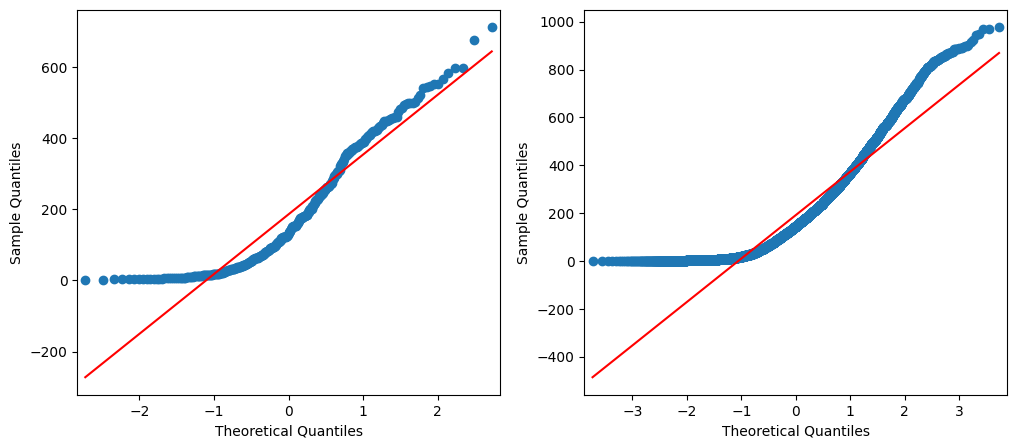

In [79]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)
#plotting the qq plot for the working day
sm.qqplot(holiday, line = 's', ax = ax)

ax = fig.add_subplot(122)
#plotting the qq plot for the non-working day
sm.qqplot(non_holiday, line = 's', ax = ax)
plt.show()

- From above as we can see the plot doesn't align with the red line which represents the normal distribution so we can infer that doesn't follow the Normal distribution

##### Checking Normality via Shapiro-wilk test

Assuming the Hypothesis for Shapiro test
- Ho - The sample follow the Normal distribution
- Ha - The sample doesn't follow the Normal distribution

In [80]:
#importing the required library for the Shapiro test
from scipy.stats import shapiro

# shapiro test
test_stat, p_value = shapiro(holiday)

print(p_value)

#checking for hypothesis
if p_value < 0.05: #assuming alpha as 5%
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

5.859704133590396e-14
Reject the null hypothesis


In [81]:
#shaprio test
test_stat, p_value = shapiro(non_holiday)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.0
Reject the null hypothesis


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


So we can say that sample of both holiday and non-holiday data doesn't follow the normal distribution.

##### Using box-cox to normalise the data if possible

In [82]:
from scipy.stats import boxcox

transformed_holiday, best_lambda = boxcox(holiday)
test_stat, p_value = shapiro(transformed_holiday)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

2.1349180201468698e-07
Reject the null hypothesis


In [83]:
transformed_non_holiday, best_lambda = boxcox(non_holiday)
test_stat, p_value = shapiro(transformed_non_holiday)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.43188291313709e-36
Reject the null hypothesis


- Even after applying the boxcox transformation, the data is not normal, which we can verify from below.

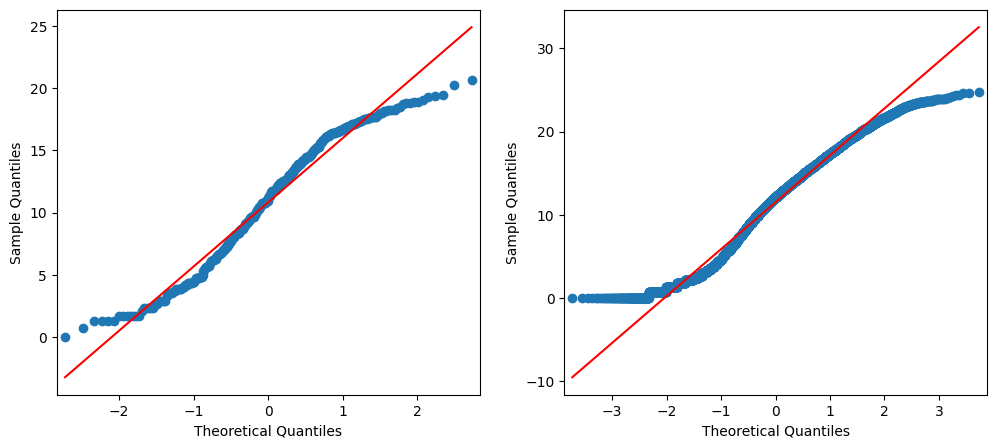

In [84]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(121)
#plotting the qq plot for the working day
sm.qqplot(transformed_holiday, line = 's', ax = ax)

ax = fig.add_subplot(122)
#plotting the qq plot for the non-working day
sm.qqplot(transformed_non_holiday, line = 's', ax = ax)
plt.show()

#### Checking for variance

##### levene test

In [85]:
#checking the homgenity of the variance using the levene test

from scipy.stats import levene

# Null Hypothesis Ho - homogeneous variance
# Alternate Hypothesis Ha - Non- homogenous variance

test_stat, p_value = levene(holiday, non_holiday)

print(p_value)

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.9991178954732041
Accept the null hypothesis


Since we were not able to reject Hypothesis so that we can say that there is homogenous variance in the data.

#### Alternate to T-test

Since the samples are not normally distributed we can not apply the independent t-test, so we will apply its alternative

##### Mann-Whitney U rank test

In [86]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

from scipy.stats import mannwhitneyu
test_stat, p_value = mannwhitneyu(holiday, non_holiday)

print(p_value)
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.8646355678725027
Accept the null hypothesis


#### Final Hypothesis



**So we can say that Mean no.of electric cycles rented is same for holiday vs non-holiday days**

### 3) Is weather dependent on season ?

Since weather and season both are categorical features, let's know about these columns bit more. and from the response in the table below also we will know the nature of both the columns.

In [87]:
df[['weather', 'season']].describe()

weather  season
count     10886   10886
unique        4       4
top           1  winter
freq       7192    2734

#### Set-up hypothesis

1. Hypothesis:
- Null Hypothesis Ho - both weather and season are independent from each other.
- Alternative Hypothesis Ha - both weathe and season are dependent on each other.

2. Define the test statistics - since both are categorical column then we can use the chi2 contingenct test and under Ho, the test should follow the chi-squared distribution.

3. Checking the basic assumption for hypothesis -  (Referred from the notes)
- The data in the cells should be frequencies, or counts of cases.
- The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
- There are 2 variables, and both are measured as categories.
- The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3).

4. compute the p-value and the assume the value of alpha as 5%
5. compare p-value & alpha and accept/reject the Ho on the basis of that.

#### Chi-squared test

In [88]:
# for the chi2 test let's first create the contingency table using the pandas crosstab
# among the weather and season column

contingency = pd.crosstab(index = df['weather'],
                          columns = df['season'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
contingency

season     fall  spring  summer  winter
weather                                
1        470116  223009  426350  356588
2        139386   76406  134177  157191
3         31160   12919   27755   30255
4             0     164       0       0

since the last row contains values less than 5 , then we need to drop it since values should be more than 5

In [89]:
contingency = pd.crosstab(index = df['weather'],
                          columns = df['season'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0).to_numpy()[:3, :]
contingency

array([[470116, 223009, 426350, 356588],
       [139386,  76406, 134177, 157191],
       [ 31160,  12919,  27755,  30255]])

In [90]:
#performing the chi squared test

from scipy.stats import chi2_contingency

chi2_contingency(contingency)

Chi2ContingencyResult(statistic=10838.372332480216, pvalue=0.0, dof=6, expected_freq=array([[453484.88557396, 221081.86259035, 416408.3330293 ,
        385087.91880639],
       [155812.72247031,  75961.44434981, 143073.60199337,
        132312.23118651],
       [ 31364.39195574,  15290.69305984,  28800.06497733,
         26633.8500071 ]]))

In [91]:
#checking the p_value with the alpha

if chi2_contingency(contingency)[1] < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

Reject the null hypothesis


#### Final Hypothesis

This means that dependency of weather and seasons is statistically significant.

### 4) No of bikes rented are dependent on weather ?

#### Basic Analysis

In [92]:
# lets try to see the distribution of bike rented across weather.

df.groupby(['weather'])['count'].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

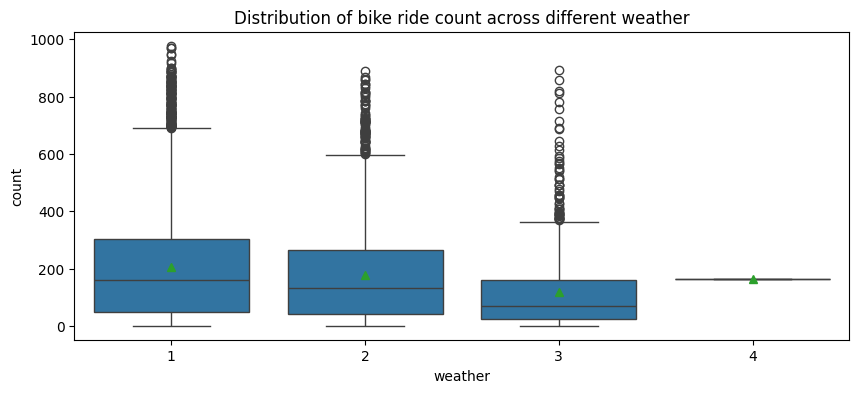

In [93]:
# box plot of bike rents across different weather

plt.figure(figsize = (10, 4))
sns.boxplot(x = df['weather'], y = df['count'], data = df, showmeans = True)
plt.title('Distribution of bike ride count across different weather')
plt.show()

In [95]:
df['count'].mean()

191.57413191254824

From above we can see the variance of the mean of the different group compared to each other and also we can compare it with the mean of the group.

In [94]:
#get the sperate data for each weather

df_weather1 = df.loc[df['weather'] == 1]['count']
df_weather2 = df.loc[df['weather'] == 2]['count']
df_weather3 = df.loc[df['weather'] == 3]['count']
df_weather4 = df.loc[df['weather'] == 4]['count']

len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

- Now we have 4 groups of bike rent data seggregated based on the weather and since we have more than 2 groups with data we can perform the ANNOVA test.
- and since for weather 4 i.e. the heavy rains season, we don't have much of the data in that, so we can ignore the same since we can't perform ANNOVA test with group with only one value.

#### Set-up Hypothesis

1. Hypothesis:
- Null Hypothesis Ho - mean no of bike rented are same for weather 1,2 and 3.
- ALternative Hypothesis Ha- mean no of bike rentred are not same for weather 1, 2 and 3

2. Checking basic assumption for Hypothesis

- Normality using the QQ plot or Shapiro, we can use box-cox to normalise the data if it is require
- Levene test for homegenous Variance of the data
- each observation is independent.

3. Test Statistics :
- The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

- F= between group variance/ with-on group variance

- "between the groups" as the differences we observe among different groups, and "within the groups" as the variations within each individual group.

- Under H0, the test statistic should follow **F-Distribution**.

4. performing the ANNOVA test to get the test statistics and p_value

5. compare p-value with the alpha and decide on accepting/ rejecting of Ho.

#### Normality Test - Visual/QQ-plot or Shapiro

##### Visual analysis

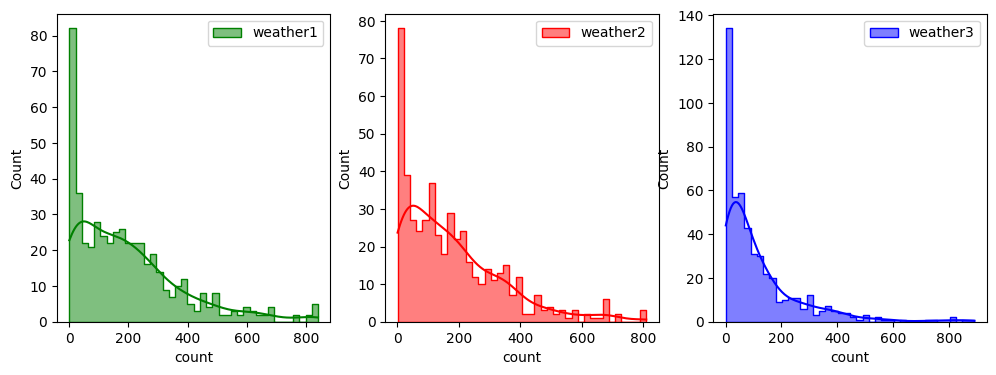

In [110]:
# from the group by the weather we know that count sample we can take for 500 items.

#fixing the see to keep the same at each run
np.random.seed(0)

# preparing the histogram for visual analysis of the distribution of bike ride for different weathers

plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_weather1.sample(500), element = 'step', bins = 40, kde = 'True', color = 'green', label = 'weather1')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(df_weather2.sample(500), element = 'step', bins = 40, kde = 'True', color = 'red', label = 'weather2')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(df_weather3.sample(500), element = 'step', bins = 40, kde = 'True', color = 'blue', label = 'weather3')
plt.legend()

plt.show()

- From the above histograms for weather 1 , 2 and 3 , we can infere that bike rent data for all these weathers is not normally distributed.

##### QQ Plot

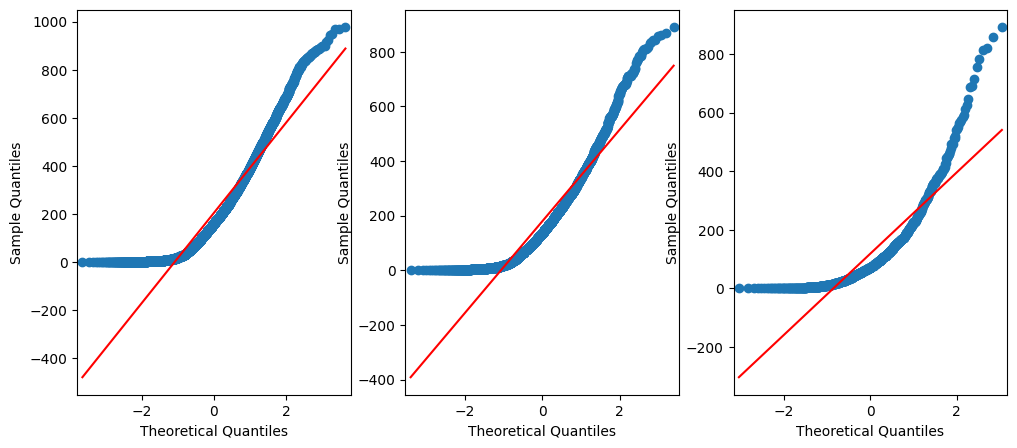

In [112]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(131)
#plotting the qq plot for the weather1
sm.qqplot(df_weather1, line = 's', ax = ax)

ax = fig.add_subplot(132)
#plotting the qq plot for the weather2
sm.qqplot(df_weather2, line = 's', ax = ax)

ax = fig.add_subplot(133)
#plottting the qq plot for the weather3
sm.qqplot(df_weather3, line = 's', ax = ax)

plt.show()

- From the above qq plot also we can infer that the bike rent data is not normally distributed for all 3 groups.

##### Shaprio Wilk test

In [113]:
from scipy.stats import shapiro

#Hypothesis
# Ho - The sample follow the Normal distribution
# Ha - The sample doesn't follow the Normal distribution

#shapiro test
test_stat, p_value = shapiro(df_weather1)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.0
Reject the null hypothesis


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [114]:
from scipy.stats import shapiro

#Hypothesis
# Ho - The sample follow the Normal distribution
# Ha - The sample doesn't follow the Normal distribution

#shapiro test
test_stat, p_value = shapiro(df_weather2)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

9.781063280987223e-43
Reject the null hypothesis


In [115]:
from scipy.stats import shapiro

#Hypothesis
# Ho - The sample follow the Normal distribution
# Ha - The sample doesn't follow the Normal distribution

#shapiro test
test_stat, p_value = shapiro(df_weather3)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

3.876090133422781e-33
Reject the null hypothesis


- For the above 3 groups we can say that these doesn't follow the normal distribution since the Null Hypothesis is rejected.

##### Box-Cox transformation and check normality again

Since from above analysis we know that our data in all 3 groups is not normally distributed, we will try to make it normallly distributed using the Box Cox transformation.

In [116]:
from scipy.stats import boxcox

transformed_df_weather1, best_lambda = boxcox(df_weather1)
test_stat, p_value = shapiro(transformed_df_weather1)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

2.061217589223373e-32
Reject the null hypothesis


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [117]:
from scipy.stats import boxcox

transformed_df_weather2, best_lambda = boxcox(df_weather2)
test_stat, p_value = shapiro(transformed_df_weather2)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.9219748327822736e-19
Reject the null hypothesis


In [118]:
from scipy.stats import boxcox

transformed_df_weather3, best_lambda = boxcox(df_weather3)
test_stat, p_value = shapiro(transformed_df_weather3)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.4137293646854232e-06
Reject the null hypothesis


Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.

#### Levene's test

In [120]:
from scipy.stats import levene

#hypothesis test
# Ho- Homegenous variance
# Ha - Non-homegenous variance

# levene test
test_stat, p_value = levene(df_weather1, df_weather2, df_weather3)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

6.198278710731511e-36
Reject the null hypothesis


Sample doesn't have homegenous variance.

#### ANNOVA test

Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

#### KW Test

In [123]:
from scipy.stats import kruskal

# Hypothesis
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05

alpha = 0.05

#kw test
test_stat, p_value = kruskal(df_weather1, df_weather2, df_weather3)
print(test_stat)
print(p_value)

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

204.95566833068537
3.122066178659941e-45
Reject the null hypothesis


- Null hypothesis is rejected so we can say that Mean no of cycles rented is NOT same for all the weathers.
- Also note that KW test doesn't tell about which group is different, that we have to determine seperately.

### 5) No of bikes rented are dependent on season?

#### Basic Analysis

In [125]:
# lets try to see the distribution of bike rented across different seasons.

df.groupby(['season'])['count'].describe()

count        mean         std  min   25%    50%    75%    max
season                                                                
fall    2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
spring  2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
summer  2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
winter  2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

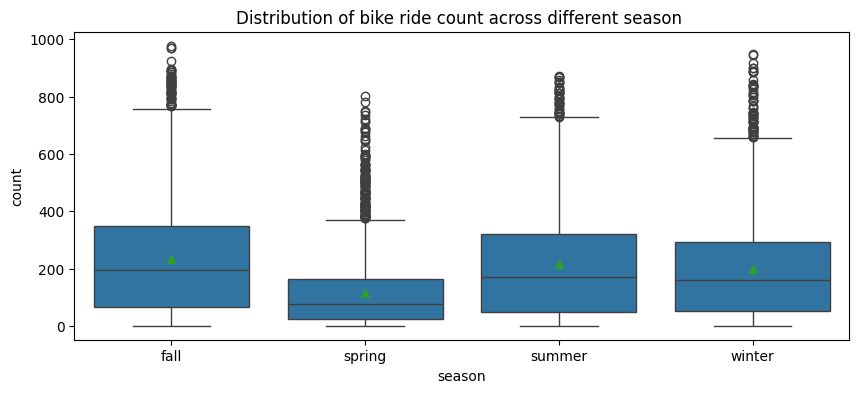

In [126]:
# box plot of bike rents across different season

plt.figure(figsize = (10, 4))
sns.boxplot(x = df['season'], y = df['count'], data = df, showmeans = True)
plt.title('Distribution of bike ride count across different season ')
plt.show()

In [127]:
df['count'].mean()

191.57413191254824

From above we can see the variance of the mean of the different group compared to each other and also we can compare it with the mean of the group.

In [128]:
#get the sperate data for each weather

df_fall = df.loc[df['season'] == 'fall']['count']
df_spring = df.loc[df['season'] == 'spring']['count']
df_summer = df.loc[df['season'] == 'summer']['count']
df_winter = df.loc[df['season'] == 'winter']['count']

len(df_fall), len(df_spring), len(df_summer), len(df_winter)

(2733, 2686, 2733, 2734)

- Now we have 4 groups of bike rent data seggregated based on the season and since we have more than 2 groups with data we can perform the ANNOVA test.

#### Set-up Hypothesis

1. Hypothesis:
- Null Hypothesis Ho - mean no of bike rented are same for all the seasons
- ALternative Hypothesis Ha- mean no of bike rentred are not same for all the season

2. Checking basic assumption for Hypothesis

- Normality using the QQ plot or Shapiro, we can use box-cox to normalise the data if it is require
- Levene test for homegenous Variance of the data
- each observation is independent.

3. Test Statistics :
- The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

- F= between group variance/ with-on group variance

- "between the groups" as the differences we observe among different groups, and "within the groups" as the variations within each individual group.

- Under H0, the test statistic should follow **F-Distribution**.

4. performing the ANNOVA test to get the test statistics and p_value

5. compare p-value with the alpha and decide on accepting/ rejecting of Ho.

#### Normality Test - Visual/QQ-plot or Shapiro

##### Visual analysis

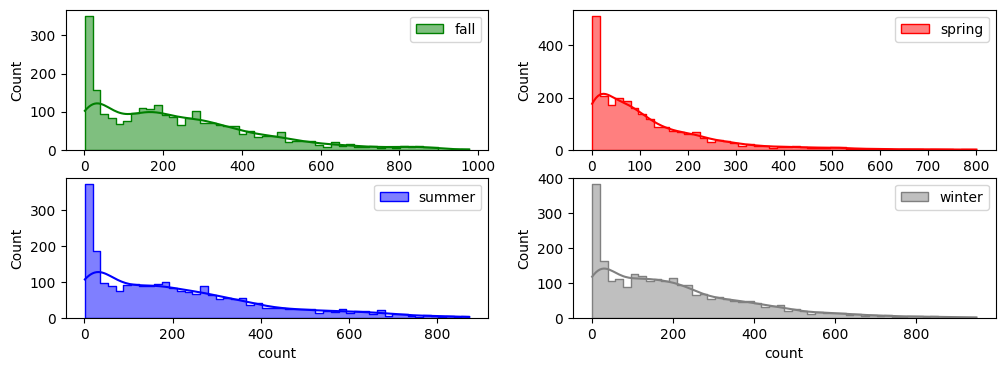

In [135]:
# from the group by the weather we know that count sample we can take for 500 items.

#fixing the see to keep the same at each run
np.random.seed(0)

# preparing the histogram for visual analysis of the distribution of bike ride for different weathers

plt.figure(figsize = (12, 4))

plt.subplot(2, 2, 1)
sns.histplot(df_fall.sample(2500), element = 'step', bins = 50, kde = 'True', color = 'green', label = 'fall')
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(df_spring.sample(2500), element = 'step', bins = 50, kde = 'True', color = 'red', label = 'spring')
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(df_summer.sample(2500), element = 'step', bins = 50, kde = 'True', color = 'blue', label = 'summer')
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(df_winter.sample(2500), element = 'step', bins = 50, kde = 'True', color = 'grey', label = 'winter')
plt.legend()

plt.show()

- From the above histograms for all the season , we can infere that bike rent data for all these weathers is not normally distributed, they all are right or positively skewed.

##### QQ Plot

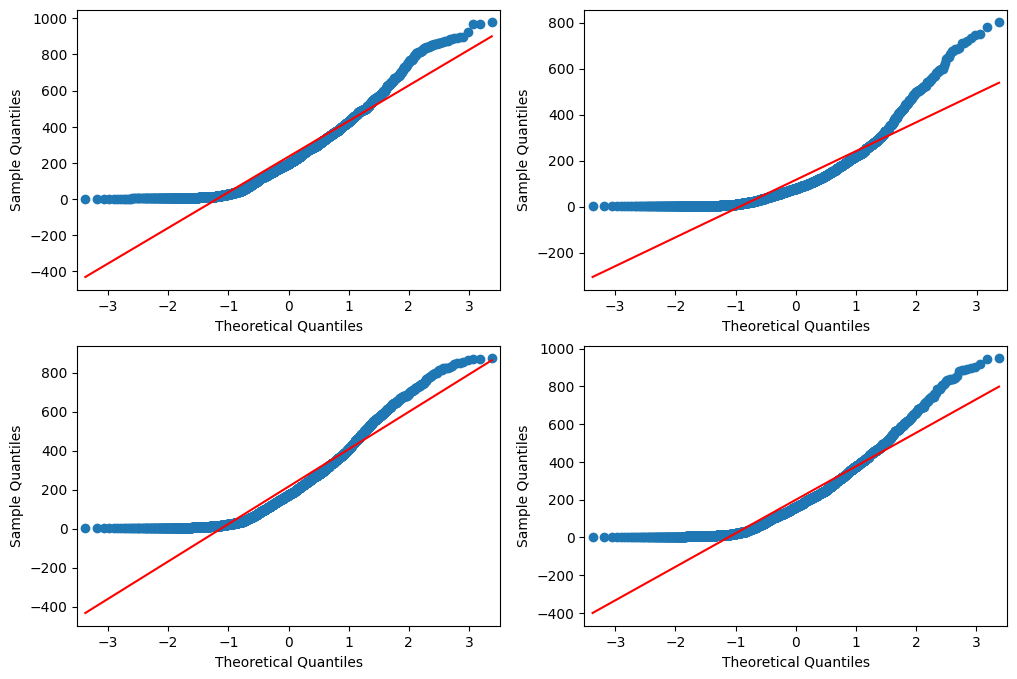

In [138]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(221)
#plotting the qq plot for the fall season
sm.qqplot(df_fall, line = 's', ax = ax)

ax = fig.add_subplot(222)
#plotting the qq plot for the spring season
sm.qqplot(df_spring, line = 's', ax = ax)

ax = fig.add_subplot(223)
#plottting the qq plot for the summer season
sm.qqplot(df_summer, line = 's', ax = ax)

ax = fig.add_subplot(224)
#plottting the qq plot for the winter season
sm.qqplot(df_winter, line = 's', ax = ax)

plt.show()

- From the above qq plot also we can infer that the bike rent data is not normally distributed for any of the season.

##### Shaprio Wilk test

In [139]:
from scipy.stats import shapiro

#Hypothesis
# Ho - The sample follow the Normal distribution
# Ha - The sample doesn't follow the Normal distribution

#shapiro test
test_stat, p_value = shapiro(df_fall)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.043458045587339e-36
Reject the null hypothesis


In [140]:
from scipy.stats import shapiro

#Hypothesis
# Ho - The sample follow the Normal distribution
# Ha - The sample doesn't follow the Normal distribution

#shapiro test
test_stat, p_value = shapiro(df_spring)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

0.0
Reject the null hypothesis


In [141]:
from scipy.stats import shapiro

#Hypothesis
# Ho - The sample follow the Normal distribution
# Ha - The sample doesn't follow the Normal distribution

#shapiro test
test_stat, p_value = shapiro(df_summer)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

6.039093315091269e-39
Reject the null hypothesis


In [142]:
from scipy.stats import shapiro

#Hypothesis
# Ho - The sample follow the Normal distribution
# Ha - The sample doesn't follow the Normal distribution

#shapiro test
test_stat, p_value = shapiro(df_winter)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.1301682309549298e-39
Reject the null hypothesis


- For the above 4 groups we can say that these doesn't follow the normal distribution since the Null Hypothesis is rejected.

##### Box-Cox transformation and check normality again

Since from above analysis we know that our data in all 4 groups is not normally distributed, we will try to make it normallly distributed using the Box Cox transformation.

In [143]:
from scipy.stats import boxcox

transformed_df_fall, best_lambda = boxcox(df_fall)
test_stat, p_value = shapiro(transformed_df_fall)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

3.633076558454534e-22
Reject the null hypothesis


In [146]:
from scipy.stats import boxcox

transformed_df_spring, best_lambda = boxcox(df_spring)
test_stat, p_value = shapiro(transformed_df_spring)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.7078635979982302e-17
Reject the null hypothesis


In [147]:
from scipy.stats import boxcox

transformed_df_summer, best_lambda = boxcox(df_summer)
test_stat, p_value = shapiro(transformed_df_summer)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

2.7914447714243264e-22
Reject the null hypothesis


In [148]:
from scipy.stats import boxcox

transformed_df_winter, best_lambda = boxcox(df_winter)
test_stat, p_value = shapiro(transformed_df_winter)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

6.341684775404706e-21
Reject the null hypothesis


Even after applying the boxcox transformation on each of the season related bike rentals data, the samples do not follow normal distribution.

#### Levene's test

In [149]:
from scipy.stats import levene

#hypothesis test
# Ho- Homegenous variance
# Ha - Non-homegenous variance

# levene test
test_stat, p_value = levene(df_fall, df_spring, df_summer, df_winter)

print(p_value)

#checking for hypothesis
if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

1.0147116860043298e-118
Reject the null hypothesis


Sample doesn't have homegenous variance.

#### ANNOVA test

Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

#### KW Test

In [151]:
from scipy.stats import kruskal

# Hypothesis
# Ho : Mean no. of cycles rented is same for different seasons
# Ha : Mean no. of cycles rented is different for different seasons
# Assuming significance Level to be 0.05

alpha = 0.05

#kw test
test_stat, p_value = kruskal(df_fall, df_spring, df_summer, df_winter)
print(test_stat)
print(p_value)

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

699.6668548181988
2.479008372608633e-151
Reject the null hypothesis


- Null hypothesis is rejected so we can say that Mean no of cycles rented is NOT same for all the weathers.
- Also note that KW test doesn't tell about which group is different, that we have to determine seperately.

### Correlation matrix

In [157]:
corr_data = df.select_dtypes(include = 'number').corr()
corr_data

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   

               count  
temp        0.394454  
atemp       0.389784  
humidity   -0.317371  
windspeed   0.101369  
casual      0.690414  
registered  0.970948  
count       1.000000

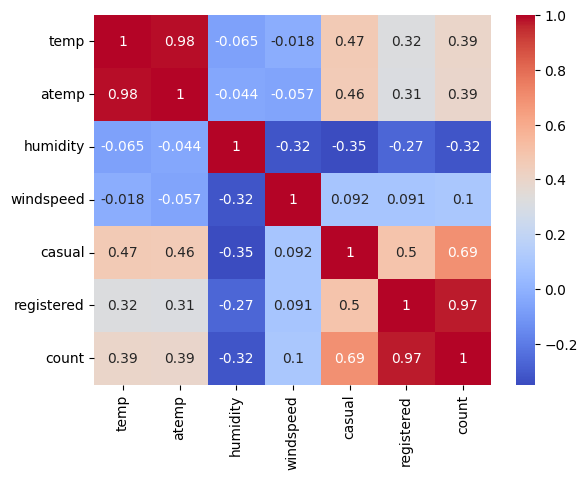

In [158]:
# creating the heatmap from the above data

sns.heatmap(corr_data, annot = True, cmap = 'coolwarm')
plt.show()

- Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]
- High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
- Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
- Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
- Negligible correlation exists between all other combinations of columns.

#### Pair plot

[]

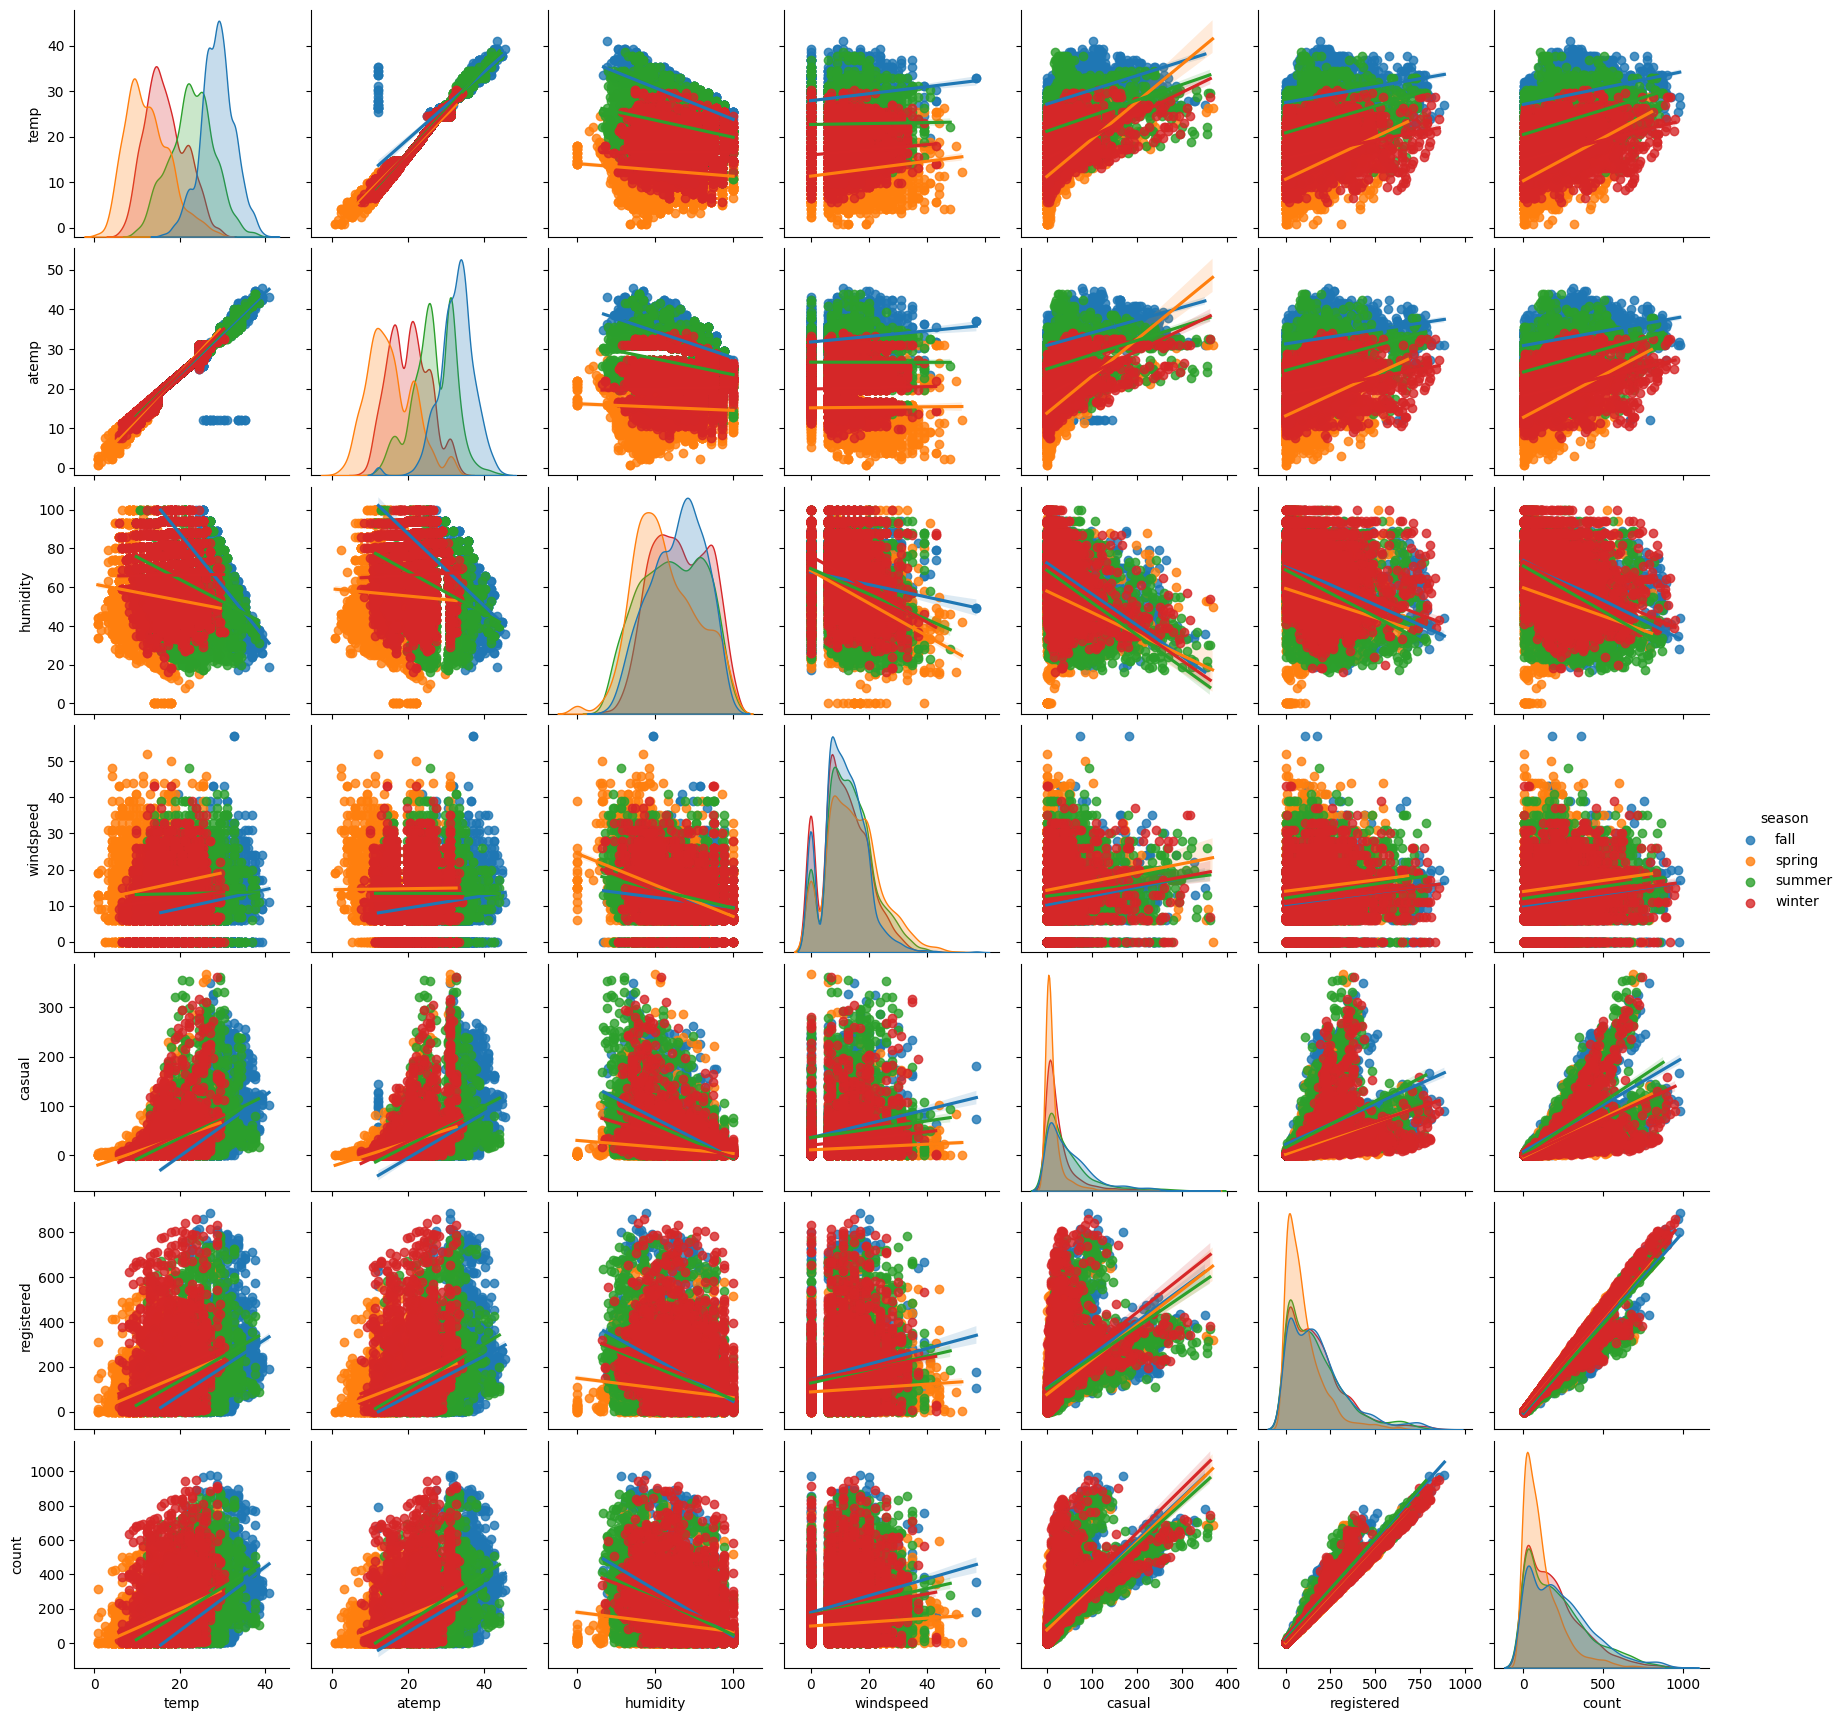

In [160]:
sns.pairplot(data = df, kind = 'reg', hue = 'season')
plt.plot()

## Insights

- The provided dataset spans from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'), encompassing a duration of '718 days 23:00:00'.
- Among every 100 users, approximately 19 are categorized as casual users, while the remaining 81 are registered users.
- The average total hourly bike rental count stands at 144 for the year 2011 and 239 for the year 2012. This indicates an impressive annual growth rate of 65.41% in the demand for electric bikes on an hourly basis.
- An seasonal pattern emerges, showcasing heightened demand during the spring and summer months, followed by a mild decline in the fall and a more pronounced drop in the winter.
- The average hourly bike rental count hits its lowest point in January, closely trailed by February and March.
- A distinctive day time basis fluctuation is observed, featuring diminished counts during the early morning hours, a sudden surge in the morning, peak usage during the afternoon, and a gradual tapering off in the evening and nighttime.
- It's worth mentioning that over 80% of the recorded time periods experience temperatures below 28 degrees Celsius.
- Furthermore, humidity levels surpass 40% for more than 80% of the recorded instances, suggesting that humidity levels predominantly remain between the optimal range and overly moist conditions.
- In addition, over 85% of the dataset's windspeed measurements fall below 20, indicating generally moderate wind conditions. 💨
- Regarding weather conditions, the highest hourly bike rental counts are observed during clear and cloudy weather, followed by misty conditions and rainy weather. Records for extreme weather conditions are notably scarce.

### Hypothesis Summary


1)Is there any effect of Working Day on the number of electric cycles rented ? <br>
The mean hourly count of the total rental bikes is statistically similar for both working and non-working days.

2)Is there any effect of holidays on the number of electric cycles rented ? <br>
There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.

3)Is weather  dependent on the season ? <br>
The hourly total number of rental bikes is statistically different for different weathers.

4)Is the number of cycles rented is similar or different in different weather ? <br>
There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.

5)Is the number of cycles rented is similar or different in different season ? <br>
The hourly total number of rental bikes is statistically different for different seasons.

## Recommendations -

(I have above insights to ChatGPT and it has written these recommendations for me) 😀

Based on the analysis insights you provided, here are some recommendations:

1. **Expand Bike Fleet and Infrastructure**:
   - **Growth Rate**: The impressive 65.41% annual growth in hourly bike rentals from 2011 to 2012 suggests a rising demand for electric bikes. To meet this increasing demand, it's crucial to expand the bike fleet and enhance the supporting infrastructure, such as charging stations and bike lanes.

2. **Target Seasonal Promotions and Campaigns**:
   - **Seasonal Patterns**: With higher demand during spring and summer, targeted promotions and marketing campaigns during these peak seasons can further boost rentals. Additionally, consider offering discounts or special packages during the fall and winter months to mitigate the drop in demand.

3. **Optimize Rental Availability Based on Daily Fluctuations**:
   - **Daily Usage Patterns**: The fluctuation in bike rentals throughout the day indicates peak usage during the morning and afternoon. Adjusting bike availability and ensuring sufficient supply during these peak hours can improve user satisfaction. Implementing dynamic pricing based on demand could also be explored.

4. **Consider Environmental Factors in Planning**:
   - **Temperature, Humidity, and Windspeed**: Given that over 80% of the time, temperatures are below 28°C and humidity levels are above 40%, it’s important to ensure bikes are well-maintained to perform optimally under these conditions. Additionally, promoting bike usage on days with favorable weather conditions could enhance user experience.

5. **Weather-Dependent Strategies**:
   - **Weather Conditions**: Since clear and cloudy weather conditions see the highest bike rental counts, developing weather-dependent strategies such as promotions on clear days and safety tips for riding in misty or rainy conditions can be beneficial. Ensuring real-time weather updates and alerts for users can enhance safety and planning.

6. **Focus on Casual User Conversion**:
   - **User Demographics**: With only 19% casual users, there is significant potential to convert casual users into registered users. Offering incentives such as membership discounts, loyalty programs, and personalized offers can encourage casual users to register.

7. **Improve User Experience on Non-Working Days and Holidays**:
   - **Working and Non-Working Days**: The statistical similarity in bike rentals on working and non-working days suggests a consistent demand. However, enhancing the user experience on holidays through special events, guided tours, or family packages could increase usage on these days.

8. **Leverage Data for Strategic Decisions**:
   - **Hypothesis Testing Results**: Use the insights from hypothesis testing to inform strategic decisions. For example, understanding the dependency of bike rentals on weather and season can help in forecasting demand and planning resources accordingly. Recognizing that rentals differ significantly across seasons and weather conditions, tailor services and marketing efforts to align with these variations.

By implementing these recommendations, you can optimize operations, enhance user experience, and capitalize on the growing demand for electric bike rentals.